In [10]:
import numpy as np
import pandas as pd

import os
import calendar
from pathlib import Path
import networkx as nx
import seaborn as sns

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import plot_tree
from sklearn.svm import LinearSVC, SVC

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm


from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary

import mglearn
import pydotplus

import warnings
warnings.filterwarnings('ignore')

# Neural Network
import os
os.environ['KERAS_BACKEND']='tensorflow'
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from IPython.display import display

# 1. Load data and change data type

In [2]:
health_df = pd.read_csv('NHANES.csv')
print(health_df.shape)
health_df.head(5)

(5769, 52)


,id,age,age_group,gender,race,weight,height,bmi,edu,college,...,food_ratio,income,poverty_level,poverty_level_category,depression,frax_risk,hypertension,cholesterol,diabetes,oral
0,73557,69,6,1,4,78.3,171.3,26.7,3,0,...,0.793,1450,0.86,1,0,0,1,1,1,0
1,73558,54,5,1,3,89.5,176.8,28.6,3,0,...,0.783,1875,0.92,1,0,1,1,1,1,1
2,73559,72,7,1,3,88.9,175.3,28.9,4,0,...,0.857,5825,4.37,3,0,0,1,1,1,1
3,73561,73,7,2,3,52.0,162.4,19.7,5,1,...,0.746,7325,5.00,3,1,1,1,0,0,1
4,73562,56,5,1,1,105.0,158.7,41.7,4,0,...,0.714,5825,5.00,3,1,0,1,1,0,1


In [3]:
categorical_list = ("age_group", "gender", "race", "edu", "college", "drink_milk", "home_owned", "health_condition", "nutrition_info", "heavy_sport", "family_heart", "family_diabetes", "family_osteoporosis", "smoke_now", "smoke_100", "poverty_level_category", "depression", "frax_risk", "hypertension", "cholesterol", "diabetes", "oral")

In [4]:
for var in categorical_list:
    health_df[var] = health_df[var].astype('category',copy=False)

pd.DataFrame({'mean': health_df.mean(),
            'sd': health_df.std(),
            'min': health_df.min(),
            'max': health_df.max(),
            'median': health_df.median(), 
            'length': len(health_df),
            'miss.val': health_df.isnull().sum(),
            })

# 2. Data Visualization

Six medical conditions of interest:
1. Depression
2. Fracture Risk
3. Hypertension
4. High Cholesterol
5. Diabetes
6. Oral Health

## 2.1 Depression

In [5]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    ha='center', va='bottom')

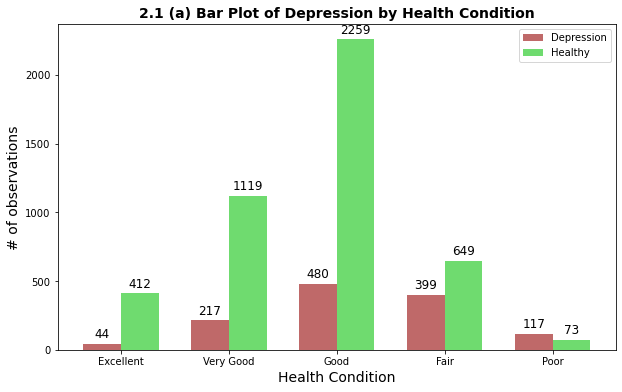

In [11]:
health_condition = []
depression_group = []
non_depression_group = []
depression_ratio = []

depression_label = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

ind = np.arange(1,6)

for i in range(1,6):
    health_condition.append(i)
    health_df_group = health_df[health_df.health_condition==i]
    
    depression_group.append(np.count_nonzero(health_df_group.depression == 1))
    
    non_depression_group.append(np.count_nonzero(health_df_group.depression == 0))
    
    depression_ratio.append(round(depression_group[i-1]/(depression_group[i-1] + non_depression_group[i-1]) * 100,1))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,6))
p1_21 = ax.bar(ind, depression_group, width, bottom = 0, label = 'Depression',color='brown',alpha=0.7)
p2_21 = ax.bar(ind + width, non_depression_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p1_21)
autolabel(p2_21)

ax.set_xlabel("Health Condition", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.1 (a) Bar Plot of Depression by Health Condition', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(depression_label)
ax.legend()
plt.show()

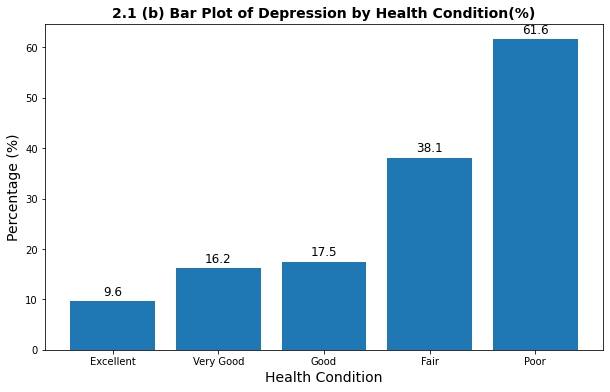

In [12]:
fig, ax = plt.subplots(figsize = (10,6))
p3_21 = ax.bar(depression_label, depression_ratio)
autolabel(p3_21)
ax.set_title('2.1 (b) Bar Plot of Depression by Health Condition(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Health Condition", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

## 2.2 Fracture Risk

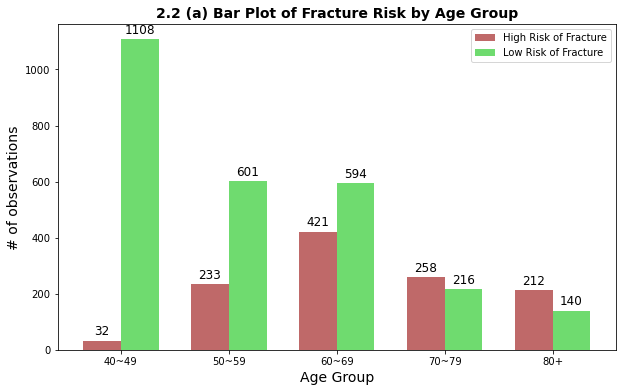

In [12]:
age_group = []
frax_risk_group = []
non_frax_risk_group = []
frax_risk_ratio = []

age_group_label_frac = ['40~49', '50~59', '60~69', '70~79', '80+']

N = 5
ind = np.arange(N)

for i in range(N):
    age_group.append(i)
    health_df_group = health_df[health_df.age_group==i+4]
    
    frax_risk_group.append(np.count_nonzero(health_df_group.frax_risk == 1))
    
    non_frax_risk_group.append(np.count_nonzero(health_df_group.frax_risk == 0))
    
    frax_risk_ratio.append(round(100 * frax_risk_group[i] / (frax_risk_group[i] + non_frax_risk_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,6))
p1_22 = ax.bar(ind, frax_risk_group, width, bottom = 0, label = 'High Risk of Fracture',color='brown',alpha=0.7)
p2_22 = ax.bar(ind + width, non_frax_risk_group, width, bottom = 0, label = 'Low Risk of Fracture',color='limegreen',alpha=0.7)

autolabel(p1_22)
autolabel(p2_22)

ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.2 (a) Bar Plot of Fracture Risk by Age Group', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(age_group_label_frac)
ax.legend()

plt.show()

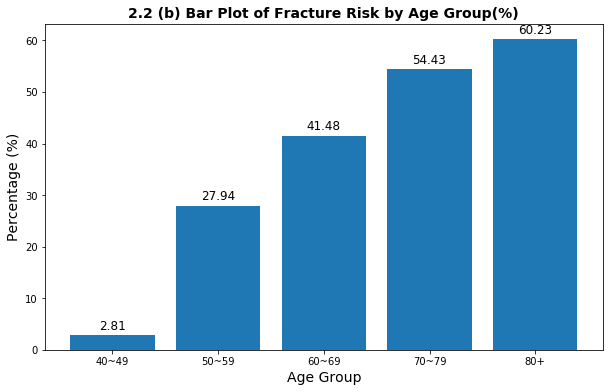

In [70]:
fig, ax = plt.subplots(figsize = (10,6))
p3_22 = ax.bar(age_group_label_frac, frax_risk_ratio)
autolabel(p3_22)
ax.set_title('2.2 (b) Bar Plot of Fracture Risk by Age Group(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

## 2.3 Hypertension

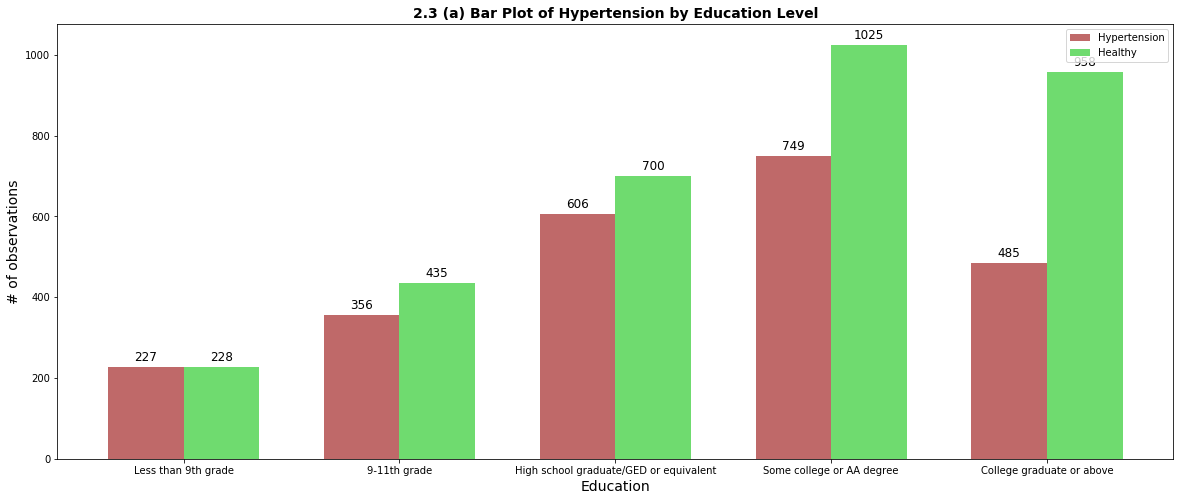

In [71]:
edu_group = []
hyper_group = []
non_hyper_group = []
hyper_ratio = []

edu_label = ['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above']

N = 5
ind = np.arange(N)

for i in range(N):
    # edu_group.append(i)
    health_df_group = health_df[health_df.edu==i+1]
    
    hyper_group.append(np.count_nonzero(health_df_group.hypertension == 1))
    
    non_hyper_group.append(np.count_nonzero(health_df_group.hypertension == 0))
    
    hyper_ratio.append(round(100 * hyper_group[i] / (hyper_group[i] + non_hyper_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (20,8))
p1_23 = ax.bar(ind, hyper_group, width, bottom = 0, label = 'Hypertension',color='brown',alpha=0.7)
p2_23 = ax.bar(ind + width, non_hyper_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p1_23)
autolabel(p2_23)

ax.set_xlabel("Education", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.3 (a) Bar Plot of Hypertension by Education Level', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(edu_label)
ax.legend()

plt.show()

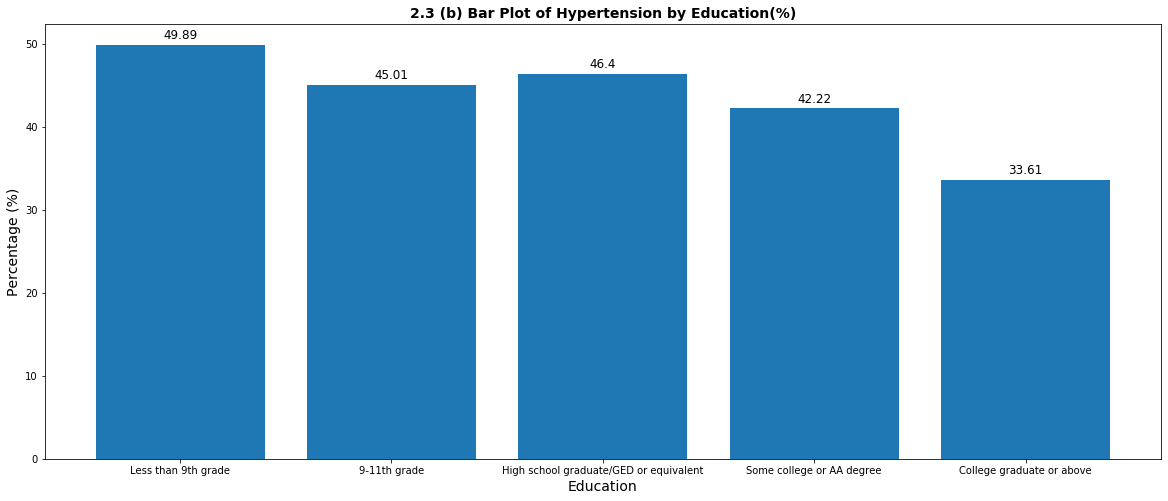

In [72]:
fig, ax = plt.subplots(figsize = (20,8))
p3_23 = ax.bar(edu_label, hyper_ratio)
autolabel(p3_23)
ax.set_title('2.3 (b) Bar Plot of Hypertension by Education(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Education", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

## 2.4 High Cholesterol

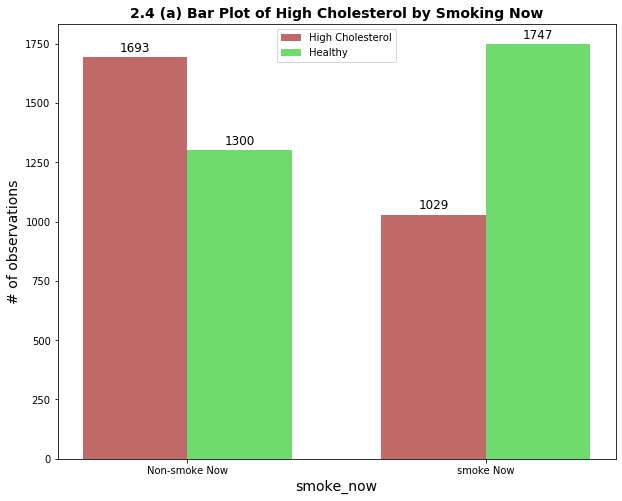

In [76]:
smoke_now_group = []
cholesterol_group = []
non_cholesterol_group = []
cholesterol_ratio = []

smoke_now_label = ['Non-smoke Now','smoke Now']

N = 2
ind = np.arange(N)

for i in range(N):
    # smoke_now_group.append(i)
    health_df_group = health_df[health_df.smoke_now==i]
    
    cholesterol_group.append(np.count_nonzero(health_df_group.cholesterol == 1))
    
    non_cholesterol_group.append(np.count_nonzero(health_df_group.cholesterol == 0))
    
    cholesterol_ratio.append(round(100 * cholesterol_group[i] / (cholesterol_group[i] + non_cholesterol_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,8))
p1_24 = ax.bar(ind, cholesterol_group, width, bottom = 0, label = 'High Cholesterol',color='brown',alpha=0.7)
p2_ = ax.bar(ind + width, non_cholesterol_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p1_24)
autolabel(p2_24)

ax.set_xlabel("smoke_now", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.4 (a) Bar Plot of High Cholesterol by Smoking Now', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(smoke_now_label)
ax.legend()

plt.show()

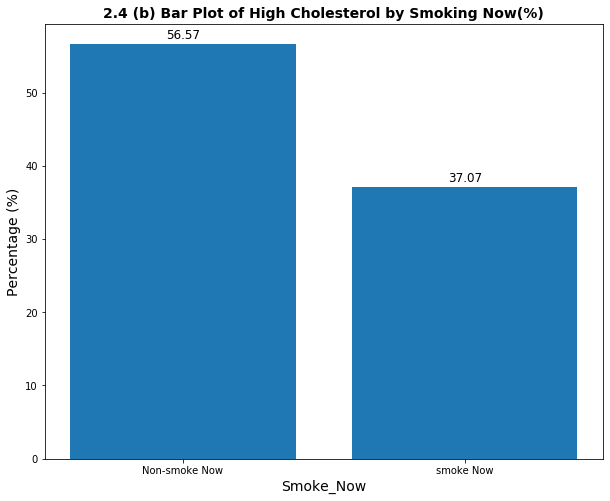

In [77]:
fig, ax = plt.subplots(figsize = (10,8))
p3_24 = ax.bar(smoke_now_label, cholesterol_ratio)
autolabel(p3_24)
ax.set_title('2.4 (b) Bar Plot of High Cholesterol by Smoking Now(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Smoke_Now", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

### Strange: causality mistake. Key: NOW

Lets see who is smoking now (by age group)

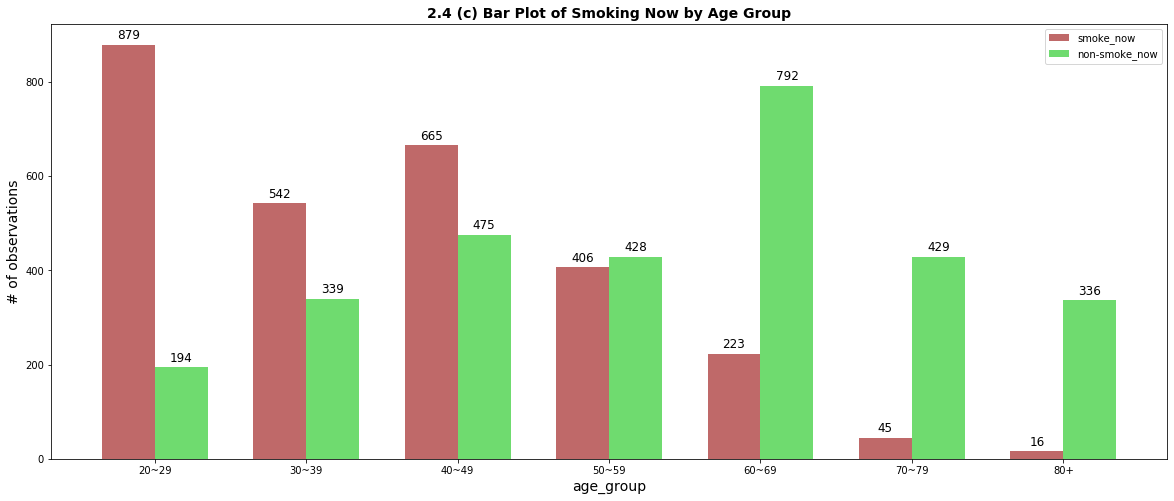

In [87]:
# age_group = []
smoke_now_group = []
non_smoke_now_group = []
smoke_now_ratio = []

age_label = ['20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80+']

N = 7
ind = np.arange(N)

for i in range(N):
    #age_group.append(i)
    health_df_group = health_df[health_df.age_group==i+2]
    
    smoke_now_group.append(np.count_nonzero(health_df_group.smoke_now== 1))
    
    non_smoke_now_group.append(np.count_nonzero(health_df_group.smoke_now== 0))
    
    smoke_now_ratio.append(round(100 * smoke_now_group[i] / (smoke_now_group[i] + non_smoke_now_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (20,8))
p4_24 = ax.bar(ind, smoke_now_group, width, bottom = 0, label = 'smoke_now',color='brown',alpha=0.7)
p5_24 = ax.bar(ind + width, non_smoke_now_group, width, bottom = 0, label = 'non-smoke_now',color='limegreen',alpha=0.7)

autolabel(p4_24)
autolabel(p5_24)

ax.set_xlabel("age_group", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.4 (c) Bar Plot of Smoking Now by Age Group', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(age_label)
ax.legend()

plt.show()

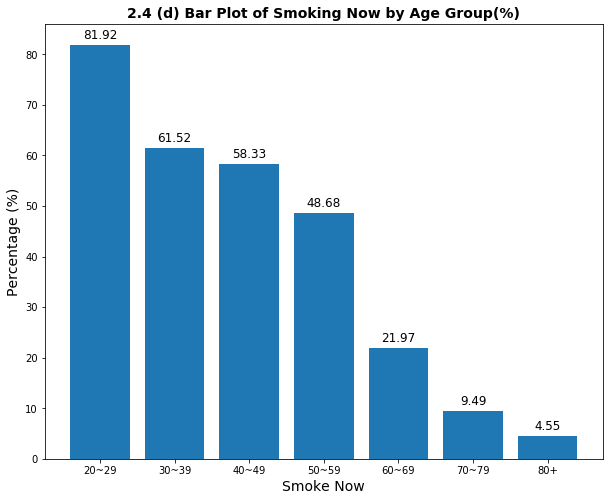

In [88]:
fig, ax = plt.subplots(figsize = (10,8))
p6_24 = ax.bar(age_label, smoke_now_ratio)
autolabel(p6_24)
ax.set_title('2.4 (d) Bar Plot of Smoking Now by Age Group(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Smoke Now", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

### Now, try to replace smoke_now with smoke_100 (Had smoke at least 100 cigarettes)

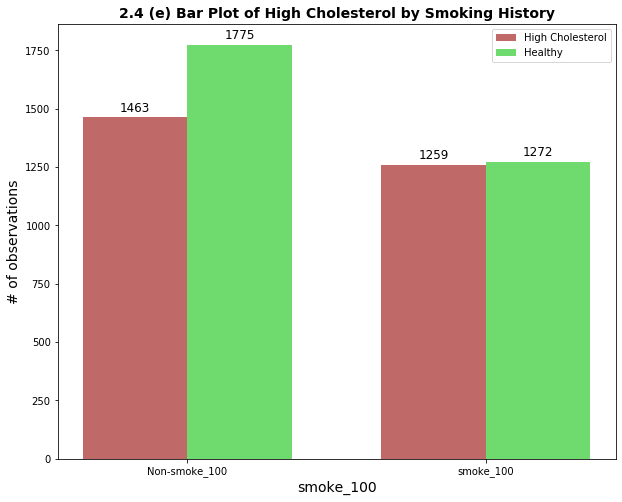

In [91]:
smoke_100_group = []
cholesterol_group = []
non_cholesterol_group = []
cholesterol_ratio = []

smoke_100_label = ['Non-smoke_100','smoke_100']

N = 2
ind = np.arange(N)

for i in range(N):
    # smoke_100_group.append(i)
    health_df_group = health_df[health_df.smoke_100==i]
    
    cholesterol_group.append(np.count_nonzero(health_df_group.cholesterol == 1))
    
    non_cholesterol_group.append(np.count_nonzero(health_df_group.cholesterol == 0))
    
    cholesterol_ratio.append(round(100 * cholesterol_group[i] / (cholesterol_group[i] + non_cholesterol_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,8))
p7_24 = ax.bar(ind, cholesterol_group, width, bottom = 0, label = 'High Cholesterol',color='brown',alpha=0.7)
p8_24 = ax.bar(ind + width, non_cholesterol_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p7_24)
autolabel(p8_24)

ax.set_xlabel("smoke_100", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.4 (e) Bar Plot of High Cholesterol by Smoking History', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(smoke_100_label)
ax.legend()

plt.show()

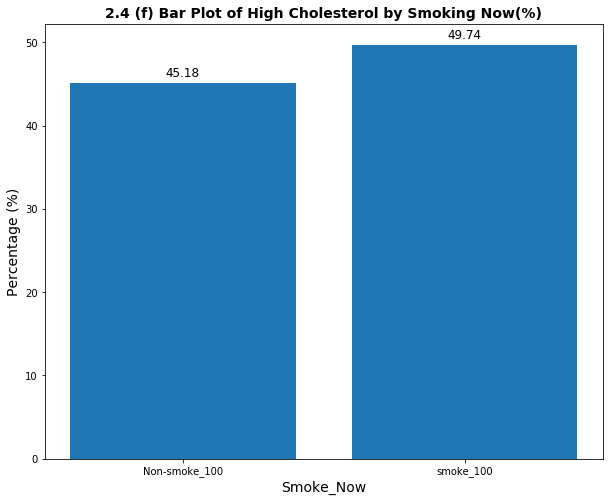

In [92]:
fig, ax = plt.subplots(figsize = (10,8))
p9_24 = ax.bar(smoke_100_label, cholesterol_ratio)
autolabel(p9_24)
ax.set_title('2.4 (f) Bar Plot of High Cholesterol by Smoking Now(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Smoke_Now", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

Not Perfect, but make much more sense

## 2.5 Diabetes

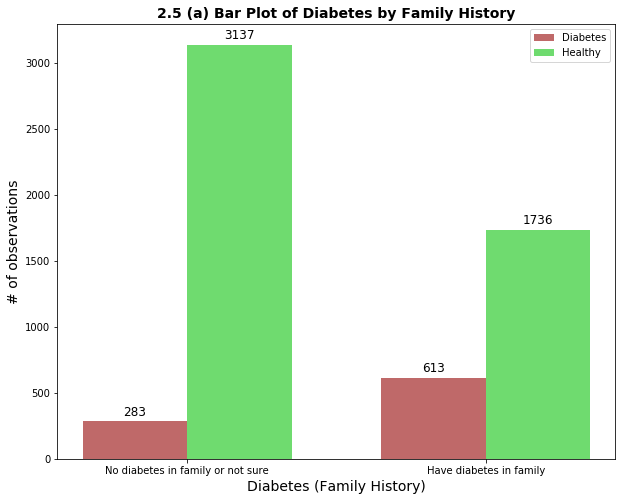

In [93]:
family_diabetes_group = []
diabetes_group = []
non_diabetes_group = [] 
diabetes_ratio = []

family_diabetes_label = ['No diabetes in family or not sure', 'Have diabetes in family']

N = 2
ind = np.arange(N)

for i in range(N):
    # nutrition_info_group.append(i)
    health_df_group = health_df[health_df.family_diabetes==i]
    
    diabetes_group.append(np.count_nonzero(health_df_group.diabetes == 1))
    
    non_diabetes_group.append(np.count_nonzero(health_df_group.diabetes == 0))
    
    diabetes_ratio.append(round(100 * diabetes_group[i] / (diabetes_group[i] + non_diabetes_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,8))
p1_25 = ax.bar(ind, diabetes_group, width, bottom = 0, label = 'Diabetes',color='brown',alpha=0.7)
p2_25 = ax.bar(ind + width, non_diabetes_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p1_25)
autolabel(p2_25)

ax.set_xlabel("Diabetes (Family History)", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.5 (a) Bar Plot of Diabetes by Family History', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(family_diabetes_label)
ax.legend()

plt.show()

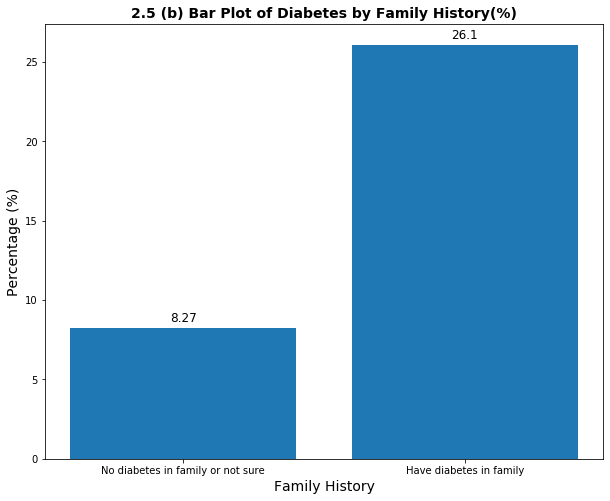

In [94]:
fig, ax = plt.subplots(figsize = (10,8))
p3_25 = ax.bar(family_diabetes_label, diabetes_ratio)
autolabel(p3_25)
ax.set_title('2.5 (b) Bar Plot of Diabetes by Family History(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Family History", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

## 2.6 Oral Health

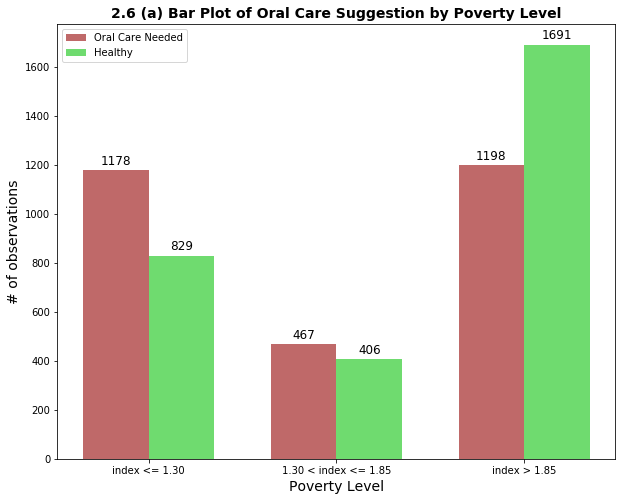

In [100]:
oral_group = []
non_oral_group = [] 
oral_ratio = []

poverty_level_category_label = ['index <= 1.30', '1.30 < index <= 1.85','index > 1.85']

N = 3
ind = np.arange(N)

for i in range(N):
    health_df_group = health_df[health_df.poverty_level_category==i+1]
    
    oral_group.append(np.count_nonzero(health_df_group.oral == 1))
    
    non_oral_group.append(np.count_nonzero(health_df_group.oral == 0))
    
    oral_ratio.append(round(100 * oral_group[i] / (oral_group[i] + non_oral_group[i]),2))
    
    
width = 0.35

fig, ax = plt.subplots(figsize = (10,8))
p1_26 = ax.bar(ind, oral_group, width, bottom = 0, label = 'Oral Care Needed',color='brown',alpha=0.7)
p2_26 = ax.bar(ind + width, non_oral_group, width, bottom = 0, label = 'Healthy',color='limegreen',alpha=0.7)

autolabel(p1_26)
autolabel(p2_26)

ax.set_xlabel("Poverty Level", fontsize=14)
ax.set_ylabel("# of observations", fontsize=14)
ax.set_title('2.6 (a) Bar Plot of Oral Care Suggestion by Poverty Level', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(poverty_level_category_label)
ax.legend()

plt.show()

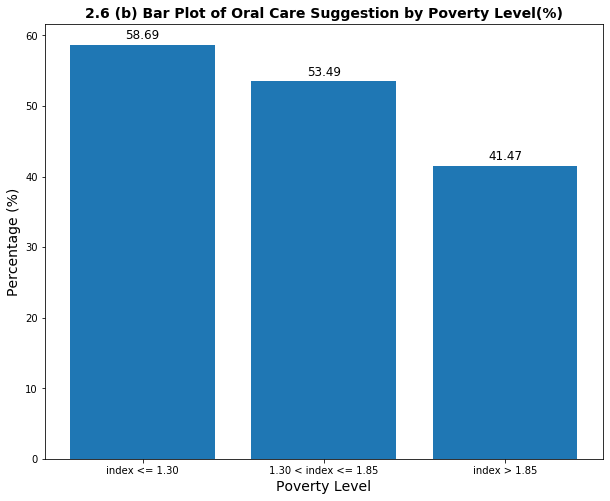

In [101]:
fig, ax = plt.subplots(figsize = (10,8))
p3_26 = ax.bar(poverty_level_category_label, oral_ratio)
autolabel(p3_26)
ax.set_title('2.6 (b) Bar Plot of Oral Care Suggestion by Poverty Level(%)', fontsize=14, fontweight='bold')
ax.set_xlabel("Poverty Level", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=14)
plt.show()

**Financial condition seem matters to oral health. But poverty level is unaccessable in reality.**

**Therefore, use cost of restaurant as a proxy.**

**Note:Could use FOOD_RATIO, but NHANES data may somehow distorted on this ratio for two reasons:**

**1. People tend to forget their true cost on food and non-food items.**

**2. People confuse the amount spend on themselves with spend on their family - their is a fair correlation between household size and spendings.**

## 2.7 Correlation Matrix

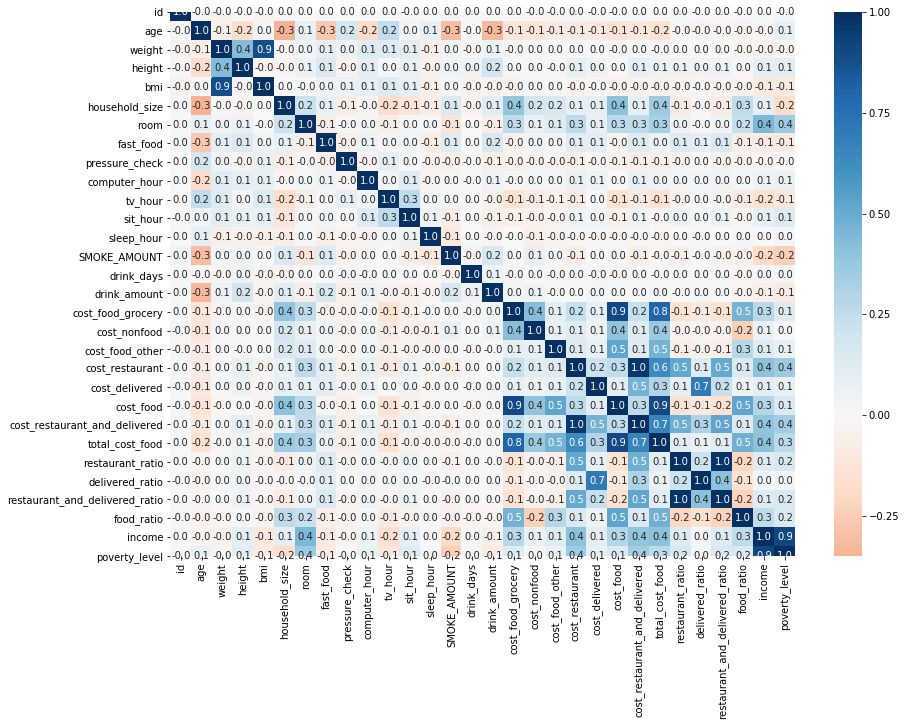

In [104]:
corr = health_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

# 3. Demension Reduction and Data Cleaning

In [110]:
reorder = ['age', 'age_group', 'weight', 'height', 'bmi', 'household_size', 'room', 'fast_food', 'computer_hour', 
           'tv_hour', 'sit_hour', 'sleep_hour', 'smoke_amount', 'drink_days', 'drink_amount', 'cost_food_grocery', 
           'cost_nonfood', 'cost_food_other', 'cost_restaurant', 'cost_delivered', 'cost_food', 
           'cost_restaurant_and_delivered', 'total_cost_food', 'restaurant_ratio', 'delivered_ratio', 
           'restaurant_and_delivered_ratio', 'food_ratio']

In [111]:
health_df_pca = health_df[reorder]

In [112]:
pcs = PCA()
pcs.fit(health_df_pca)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Standard deviation,645.3609,284.5236,182.2503,67.9554,49.9630,23.0475,17.5291,15.3010,9.3673,6.1846,...,1.2908,0.9177,0.7676,0.3033,0.1452,0.0706,0.0002,0.0,0.0,0.0
Proportion of variance,0.7727,0.1502,0.0616,0.0086,0.0046,0.0010,0.0006,0.0004,0.0002,0.0001,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
Cumulative proportion,0.7727,0.9229,0.9845,0.9931,0.9977,0.9987,0.9993,0.9997,0.9999,0.9999,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0


In [115]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=health_df_pca.columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
age,-0.004065,-0.001119,-0.001564,-0.016362,-0.034164,-0.106981,0.969859,0.034472,-0.114827,0.134620,...,0.030227,-0.002782,1.575296e-03,0.099830,0.001424,0.000163,4.829585e-07,-6.406498e-15,0.000000e+00,0.000000e+00
age_group,-0.000419,-0.000112,-0.000179,-0.001656,-0.003561,-0.011499,0.097915,0.003760,-0.011725,0.011233,...,0.003094,0.009316,-9.066623e-03,-0.994678,-0.015654,-0.001472,-3.019404e-06,6.045461e-14,-6.726748e-15,-9.469869e-15
weight,-0.000420,0.001890,0.001043,0.003105,0.019463,0.935109,0.115902,0.009470,0.097293,-0.004395,...,0.000433,-0.012121,-3.185786e-01,0.002060,0.000174,0.000001,8.275840e-07,-1.473006e-15,9.834987e-16,1.334024e-15
height,0.000644,0.003092,-0.001520,0.001951,0.003714,0.212737,-0.088212,0.052622,-0.918552,0.015140,...,0.002373,0.012166,3.137418e-01,-0.002587,-0.000355,-0.000152,-8.691851e-07,1.815281e-15,-2.609157e-15,1.747268e-16
bmi,-0.000423,-0.000409,0.000801,0.000543,0.005747,0.258997,0.071138,-0.014522,0.357631,-0.000803,...,-0.010002,0.035431,8.933245e-01,-0.008046,-0.000431,-0.000075,-2.176373e-06,3.153134e-15,-4.778597e-15,-2.705924e-15
household_size,0.001011,-0.000912,0.000011,0.001382,0.000757,0.001986,-0.028152,-0.004503,0.017414,0.008990,...,0.451393,0.007569,2.994961e-03,0.002436,-0.000220,-0.003307,-3.697504e-07,-8.647238e-15,6.896693e-15,-1.037017e-14
room,0.001090,0.000736,-0.000190,-0.000775,-0.002019,0.002358,0.017007,0.002379,-0.014214,-0.030208,...,-0.141792,0.016628,3.241410e-03,-0.000801,0.001927,-0.002704,-3.408545e-06,-3.023614e-15,8.309583e-15,-5.417498e-15
fast_food,0.000103,0.001247,0.000321,0.002251,0.002864,0.013681,-0.036582,-0.000886,-0.012716,0.027384,...,0.004917,-0.037703,-9.545518e-03,0.001553,-0.000812,0.000807,-6.848372e-07,4.025128e-15,-4.489278e-15,4.648864e-15
computer_hour,0.000068,0.000375,0.000129,0.000499,0.000919,0.008083,-0.012952,-0.000981,-0.000807,-0.010987,...,0.832479,-0.000399,5.356191e-03,-0.002128,-0.000261,-0.002113,-1.082141e-06,1.896171e-15,5.580451e-16,3.075144e-15
tv_hour,-0.000372,0.000058,0.000115,0.000821,-0.000773,0.007358,0.021955,0.001422,-0.000616,0.023193,...,-0.173916,0.042710,-1.345686e-02,0.009539,0.000032,0.000832,-1.890014e-06,3.108557e-15,-4.355342e-15,2.409323e-15


**The result of PCA seems impressive at first, but it makes the intrepretation of the model difficult. Also, it assigned significant weight on cost of food etc. Probably because data are not normalized. In practice, only data without intuitive meaning (such as ratio) should be normalized. Therefore, I will pick variables manually, using correlation matrix as a reference.**

In [90]:
selected_list = ['age_group', 'gender', 'race', 'weight', 'height', 'bmi', 'college', 'drink_milk', 
                 'household_size', 'health_condition', 'fast_food', 'nutrition_info', 'pressure_check', 
                 'family_heart', 'family_diabetes', 'family_osteoporosis', 'sit_hour', 'sleep_hour', 
                 'smoke_100', 'drink_days', 'cost_food', 'cost_nonfood', 'cost_restaurant',

                'depression', 'frax_risk', 'hypertension', 'cholesterol', 'diabetes', 'oral']

In [91]:
health_df_selected = health_df[selected_list]

In [92]:
print(health_df_selected.shape)

(5769, 29)


**There are 5769 observations in the dataset. Will keep 769 of them as final validation group. For the remaining 5,000 samples, 4,000 are used as training set and 1,000 are used at testing set.**

In [93]:
health_df_selected['random'] = np.random.normal(size=5769 ,loc=0)

In [94]:
health_df_selected = health_df_selected.sort_values(by = ['random'])
health_df_train_test = health_df_selected.iloc[:5000,:]
health_df_valid = health_df_selected.iloc[5000:,:]

In [95]:
print(health_df_train_test.shape)
print(health_df_valid.shape)

(5000, 30)
(769, 30)


In [96]:
X = health_df_train_test.drop(['depression', 'frax_risk', 'hypertension', 'cholesterol', 'diabetes', 'oral','random'],axis=1)
y_depression = health_df_train_test.depression
y_frax = health_df_train_test.frax_risk
y_hypertension = health_df_train_test.hypertension
y_cholesterol = health_df_train_test.cholesterol
y_diabetes = health_df_train_test.diabetes
y_oral = health_df_train_test.oral

In [97]:
X_v = health_df_valid.drop(['depression', 'frax_risk', 'hypertension', 'cholesterol', 'diabetes', 'oral','random'],axis=1)
y_depression_v = health_df_valid.depression
y_frax_v = health_df_valid.frax_risk
y_hypertension_v = health_df_valid.hypertension
y_cholesterol_v = health_df_valid.cholesterol
y_diabetes_v = health_df_valid.diabetes
y_oral_v = health_df_valid.oral

# 4. Model Selection - By Conditions

In [98]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

## 4.1 Depression

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y_depression, random_state=1, test_size = 0.2)

### 4.1.1 Ridge Logistic

In [164]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_depression, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.7966
Test set score: 0.7962

C: 10.00
Training set score: 0.7967
Test set score: 0.7962

C: 1.00
Training set score: 0.7966
Test set score: 0.7962

C: 0.10
Training set score: 0.7965
Test set score: 0.7962

C: 0.01
Training set score: 0.7923
Test set score: 0.7930

C: 0.00
Training set score: 0.7843
Test set score: 0.7861



In [215]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 1)')
ridge_logistic = LogisticRegression(penalty="l2", C=1)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)


classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 10)
Confusion Matrix (Accuracy 0.7965)

       Prediction
Actual    0    1
     0 3106   34
     1  780   80
Confusion Matrix (Accuracy 0.7930)

       Prediction
Actual   0   1
     0 773   4
     1 203  20
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       777
           1       0.83      0.09      0.16       223

    accuracy                           0.79      1000
   macro avg       0.81      0.54      0.52      1000
weighted avg       0.80      0.79      0.72      1000



**The indicator of interest is the precision of 1 (0.81)**

Very impressive, 0.83 is great

### 4.1.2 Lasso Logistic

In [168]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_depression, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.7967
Test set score: 0.7960

C: 10.0000
Training set score: 0.7967
Test set score: 0.7960

C: 1.0000
Training set score: 0.7966
Test set score: 0.7961

C: 0.1000
Training set score: 0.7955
Test set score: 0.7955

C: 0.0100
Training set score: 0.7852
Test set score: 0.7871

C: 0.0010
Training set score: 0.7829
Test set score: 0.7853



In [214]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 1)')
lasso_logistic = LogisticRegression(penalty="l1", C=1)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)


classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 1)
Confusion Matrix (Accuracy 0.7970)

       Prediction
Actual    0    1
     0 3108   32
     1  780   80
Confusion Matrix (Accuracy 0.7930)

       Prediction
Actual   0   1
     0 773   4
     1 203  20
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       777
           1       0.83      0.09      0.16       223

    accuracy                           0.79      1000
   macro avg       0.81      0.54      0.52      1000
weighted avg       0.80      0.79      0.72      1000



**Logistic regression seem to do well with depreesion prediction**

### 4.1.3 KNN

In [174]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [20,25,30,40]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 20.00
Training set accuracy: 0.7863
Test set accuracy: 0.7740

# of neighbors: 25.00
Training set accuracy: 0.7847
Test set accuracy: 0.7730

# of neighbors: 30.00
Training set accuracy: 0.7855
Test set accuracy: 0.7770

# of neighbors: 40.00
Training set accuracy: 0.7855
Test set accuracy: 0.7770



In [177]:
knnm = KNeighborsClassifier(n_neighbors=30)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.7855)

       Prediction
Actual    0    1
     0 3138    2
     1  856    4
Confusion Matrix (Accuracy 0.7770)

       Prediction
Actual   0   1
     0 777   0
     1 223   0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       777
           1       0.00      0.00      0.00       223

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.60      0.78      0.68      1000



**Very disappointing - the model predict everyone to be healthy**

## 4.1.4 Naive Bayes

In [193]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_depression, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.760783
Test set score: 0.761840

alpha: 1000.00
Training set score: 0.564985
Test set score: 0.565250

alpha: 100.00
Training set score: 0.513295
Test set score: 0.512840

alpha: 10.00
Training set score: 0.510128
Test set score: 0.509560

alpha: 1.00
Training set score: 0.509890
Test set score: 0.509400

alpha: 0.10
Training set score: 0.509865
Test set score: 0.509390

alpha: 0.01
Training set score: 0.509862
Test set score: 0.509410

alpha: 0.00
Training set score: 0.509862
Test set score: 0.509410



**Testing accuracy does increase as alpha goes up. But this does not indicates a better prediction power - a naive guess that predicts everyone is healthy has an accuracy score of 0.79**

In [206]:
nbm = MultinomialNB(alpha=1000)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.5457)

       Prediction
Actual    0    1
     0 1687 1453
     1  364  496
Confusion Matrix (Accuracy 0.5440)

       Prediction
Actual   0   1
     0 430 347
     1 109 114
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       777
           1       0.25      0.51      0.33       223

    accuracy                           0.54      1000
   macro avg       0.52      0.53      0.49      1000
weighted avg       0.68      0.54      0.58      1000



**Naive Bayes seems good - a fair balance between recall, and precision**

### 4.1.5 Support Vector Machine¶

In [208]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 10, 'svm__gamma': 0.01}

Testing Accuracy
0.782

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.8015)

       Prediction
Actual    0    1
     0 3133    7
     1  787   73
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.7820)

       Prediction
Actual   0   1
     0 775   2
     1 216   7
None

Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       777
           1       0.78      0.03      0.06       223

    accuracy                           0.78      1000
   macro avg       0.78      0.51      0.47      1000
weighted avg       0.78      0.78      0.69      1000



**SVM tends to label everyone as healthy to achieve high accuracy score, not good**

### 4.1.6 Decision Tree

In [209]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
Initial score:  0.785


In [211]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 5}
Improved score:  0.78975


In [212]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.7915)

       Prediction
Actual    0    1
     0 3115   25
     1  809   51
Confusion Matrix (Accuracy 0.7950)

       Prediction
Actual   0   1
     0 775   2
     1 203  20
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       777
           1       0.91      0.09      0.16       223

    accuracy                           0.80      1000
   macro avg       0.85      0.54      0.52      1000
weighted avg       0.82      0.80      0.72      1000



**Decision Tree tends to classify everyone to be healthy to achieve high accuracy score. But the precision is somehow high.**

[Text(418.5, 713.475, 'health_condition <= 3.5\ngini = 0.338\nsamples = 4000\nvalue = [3140, 860]'),
 Text(209.25, 509.625, 'gender <= 1.5\ngini = 0.276\nsamples = 3144\nvalue = [2625, 519]'),
 Text(104.625, 305.775, 'smoke_100 <= 0.5\ngini = 0.228\nsamples = 1466\nvalue = [1274, 192]'),
 Text(52.3125, 101.92499999999995, 'gini = 0.177\nsamples = 746\nvalue = [673, 73]'),
 Text(156.9375, 101.92499999999995, 'gini = 0.276\nsamples = 720\nvalue = [601, 119]'),
 Text(313.875, 305.775, 'drink_days <= 0.5\ngini = 0.314\nsamples = 1678\nvalue = [1351, 327]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.434\nsamples = 192\nvalue = [131, 61]'),
 Text(366.1875, 101.92499999999995, 'gini = 0.294\nsamples = 1486\nvalue = [1220, 266]'),
 Text(627.75, 509.625, 'gender <= 1.5\ngini = 0.479\nsamples = 856\nvalue = [515, 341]'),
 Text(523.125, 305.775, 'cost_food <= 381.0\ngini = 0.416\nsamples = 390\nvalue = [275, 115]'),
 Text(470.8125, 101.92499999999995, 'gini = 0.471\nsamples = 163\nvalue = [10

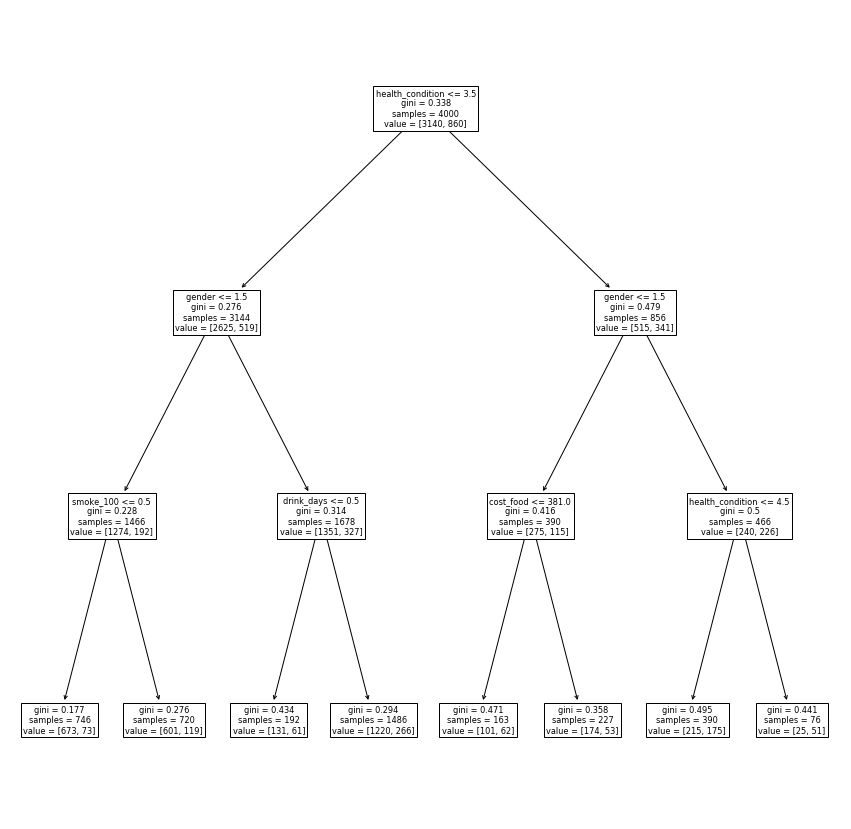

In [217]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.1.7 Random Forest

In [230]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_depression)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
70                1           0.7928                100                  4   
87                2           0.7924                150                  4   
95                3           0.7912                150                  6   
68                3           0.7912                 25                  4   
79                3           0.7912                150                  6   
..              ...              ...                ...                ...   
18               62           0.7834                100                  3   
25               62           0.7834                 50                  5   
16               94           0.7832                 25                  3   
21               94           0.7832                 50                  4   
92               96           0.7828                 25                  6   

   param_max_depth  
70              10  
87              15  


In [235]:
forest = RandomForestClassifier(n_estimators=100,max_features=4,max_depth=10)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.8635)

       Prediction
Actual    0    1
     0 3140    0
     1  546  314
Confusion Matrix (Accuracy 0.7770)

       Prediction
Actual   0   1
     0 767  10
     1 213  10
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       777
           1       0.50      0.04      0.08       223

    accuracy                           0.78      1000
   macro avg       0.64      0.52      0.48      1000
weighted avg       0.72      0.78      0.70      1000



**overfitting again**

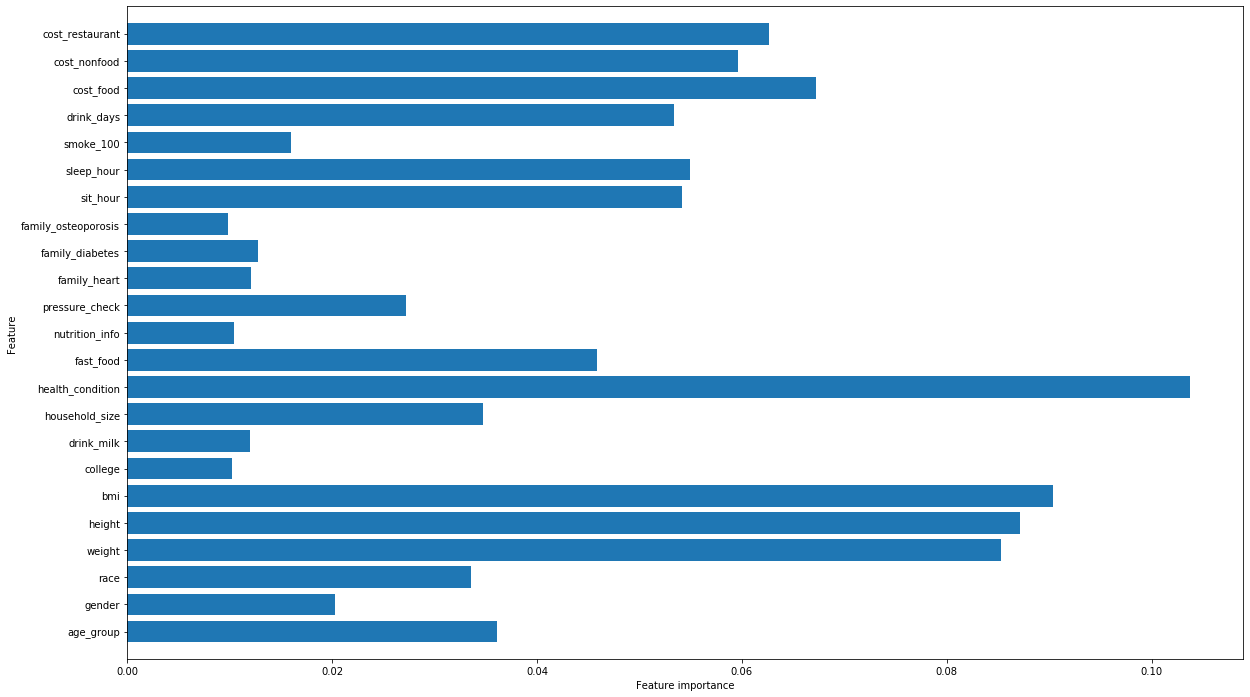

In [236]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.1.8 Neural Network

**Normalize X**

In [118]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_depression)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [15]:
def get_new_model_class_test():
    model = Sequential()
    model.add(Dense(1000, activation='tanh', input_shape = (n_col,))) 
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(2, activation='softmax')) 
    return(model)

In [119]:
lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 993us/step - loss: 0.6560 - accuracy: 0.6883 - val_loss: 0.6490 - val_accuracy: 0.6870
Epoch 2/5
4000/4000 [==============================] - 4s 947us/step - loss: 0.6440 - accuracy: 0.7250 - val_loss: 0.6376 - val_accuracy: 0.7220
Epoch 3/5
4000/4000 [==============================] - 4s 959us/step - loss: 0.6333 - accuracy: 0.7473 - val_loss: 0.6275 - val_accuracy: 0.7520
Epoch 4/5
4000/4000 [==============================] - 4s 944us/step - loss: 0.6237 - accuracy: 0.7623 - val_loss: 0.6184 - val_accuracy: 0.7700
Epoch 5/5
4000/4000 [==============================] - 4s 980us/step - loss: 0.6152 - accuracy: 0.7722 - val_loss: 0.6103 - val_accuracy: 0.7800


Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5375 - accuracy: 0.7818 - val_loss: 0.

In [120]:
lr_to_test = [0.05, 0.1, 0.3, 0.5, 0.7]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.2f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.05
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 972us/step - loss: 0.5121 - accuracy: 0.7818 - val_loss: 0.4958 - val_accuracy: 0.7850
Epoch 2/5
4000/4000 [==============================] - 4s 966us/step - loss: 0.4918 - accuracy: 0.7940 - val_loss: 0.4972 - val_accuracy: 0.7850
Epoch 3/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4922 - accuracy: 0.7900 - val_loss: 0.4923 - val_accuracy: 0.7880
Epoch 4/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4852 - accuracy: 0.7915 - val_loss: 0.5031 - val_accuracy: 0.7780
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4848 - accuracy: 0.7903 - val_loss: 0.4938 - val_accuracy: 0.7920


Current Learning Rate: 0.10
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5385 - accuracy: 0.7635 - val_loss: 0.4948 - val_a

In [152]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.05)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 4s 958us/step - loss: 0.5132 - accuracy: 0.7795
Epoch 2/5
4000/4000 [==============================] - 4s 924us/step - loss: 0.4909 - accuracy: 0.7862
Epoch 3/5
4000/4000 [==============================] - 4s 926us/step - loss: 0.4880 - accuracy: 0.7903
Epoch 4/5
4000/4000 [==============================] - 4s 917us/step - loss: 0.4842 - accuracy: 0.7925
Epoch 5/5
4000/4000 [==============================] - 4s 919us/step - loss: 0.4851 - accuracy: 0.7925


In [153]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.7883)

       Prediction
Actual    0    1
     0 3136    3
     1  844   17
Confusion Matrix (Accuracy 0.7820)

       Prediction
Actual   0   1
     0 776   3
     1 215   6
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       779
         1.0       0.67      0.03      0.05       221

    accuracy                           0.78      1000
   macro avg       0.72      0.51      0.46      1000
weighted avg       0.76      0.78      0.69      1000



**Looks bad, though certain randomness is involved with neural network**

## 4.2 frax_risk

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y_frax, random_state=1, test_size = 0.2)

### 4.2.1 Ridge Logistic

In [71]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_frax, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.8458
Test set score: 0.8417

C: 10.00
Training set score: 0.8458
Test set score: 0.8417

C: 1.00
Training set score: 0.8456
Test set score: 0.8415

C: 0.10
Training set score: 0.8440
Test set score: 0.8402

C: 0.01
Training set score: 0.8401
Test set score: 0.8381

C: 0.00
Training set score: 0.8283
Test set score: 0.8272



In [72]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 10)')
ridge_logistic = LogisticRegression(penalty="l2", C=10)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)

classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 10)
Confusion Matrix (Accuracy 0.8442)

       Prediction
Actual    0    1
     0 2983  205
     1  418  394
Confusion Matrix (Accuracy 0.8520)

       Prediction
Actual   0   1
     0 741  52
     1  96 111
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       793
           1       0.68      0.54      0.60       207

    accuracy                           0.85      1000
   macro avg       0.78      0.74      0.75      1000
weighted avg       0.84      0.85      0.85      1000



### 4.2.2 Lasso Logistic

In [73]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_frax, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.8457
Test set score: 0.8414

C: 10.0000
Training set score: 0.8458
Test set score: 0.8415

C: 1.0000
Training set score: 0.8457
Test set score: 0.8416

C: 0.1000
Training set score: 0.8441
Test set score: 0.8400

C: 0.0100
Training set score: 0.8335
Test set score: 0.8325

C: 0.0010
Training set score: 0.8003
Test set score: 0.7996



In [74]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 1)')
lasso_logistic = LogisticRegression(penalty="l1", C=1)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)

classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 1)
Confusion Matrix (Accuracy 0.8440)

       Prediction
Actual    0    1
     0 2983  205
     1  419  393
Confusion Matrix (Accuracy 0.8520)

       Prediction
Actual   0   1
     0 741  52
     1  96 111
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       793
           1       0.68      0.54      0.60       207

    accuracy                           0.85      1000
   macro avg       0.78      0.74      0.75      1000
weighted avg       0.84      0.85      0.85      1000



### 4.2.3 KNN

In [76]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [12,14,15,16,18]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 12.00
Training set accuracy: 0.8063
Test set accuracy: 0.7970

# of neighbors: 14.00
Training set accuracy: 0.8055
Test set accuracy: 0.7990

# of neighbors: 15.00
Training set accuracy: 0.8060
Test set accuracy: 0.8000

# of neighbors: 16.00
Training set accuracy: 0.8027
Test set accuracy: 0.7980

# of neighbors: 18.00
Training set accuracy: 0.8007
Test set accuracy: 0.7970



In [77]:
knnm = KNeighborsClassifier(n_neighbors=15)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.8060)

       Prediction
Actual    0    1
     0 3142   46
     1  730   82
Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual   0   1
     0 780  13
     1 187  20
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       793
           1       0.61      0.10      0.17       207

    accuracy                           0.80      1000
   macro avg       0.71      0.54      0.53      1000
weighted avg       0.77      0.80      0.74      1000



## 4.2.4 Naive Bayes

In [78]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_frax, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.774753
Test set score: 0.775650

alpha: 1000.00
Training set score: 0.731052
Test set score: 0.731370

alpha: 100.00
Training set score: 0.726603
Test set score: 0.725710

alpha: 10.00
Training set score: 0.728505
Test set score: 0.727280

alpha: 1.00
Training set score: 0.728745
Test set score: 0.727620

alpha: 0.10
Training set score: 0.728780
Test set score: 0.727660

alpha: 0.01
Training set score: 0.728785
Test set score: 0.727670

alpha: 0.00
Training set score: 0.728785
Test set score: 0.727670



**High alpha's high testing accuracy comes with a price of overfitting - select alpha = 100 instead of 10000**

In [84]:
nbm = MultinomialNB(alpha=100)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.7212)

       Prediction
Actual    0    1
     0 2599  589
     1  526  286
Confusion Matrix (Accuracy 0.7230)

       Prediction
Actual   0   1
     0 648 145
     1 132  75
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       793
           1       0.34      0.36      0.35       207

    accuracy                           0.72      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.73      0.72      0.73      1000



### 4.2.5 Support Vector Machine¶

In [85]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 100, 'svm__gamma': 0.001}

Testing Accuracy
0.858

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.8622)

       Prediction
Actual    0    1
     0 3017  171
     1  380  432
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.8580)

       Prediction
Actual   0   1
     0 739  54
     1  88 119
None

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       793
           1       0.69      0.57      0.63       207

    accuracy                           0.86      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.85      0.86      0.85      1000



### 4.2.6 Decision Tree

In [86]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Initial score:  0.86


In [90]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'min_impurity_decrease': [0, 0.0001, 0.0005, 0.0007, 0.001, 0.0015, 0.002, 0.003], 
    'min_samples_split': [2,3,4,5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0007, 'min_samples_split': 2}
Improved score:  0.86625


In [91]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.8688)

       Prediction
Actual    0    1
     0 3021  167
     1  358  454
Confusion Matrix (Accuracy 0.8730)

       Prediction
Actual   0   1
     0 754  39
     1  88 119
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       793
           1       0.75      0.57      0.65       207

    accuracy                           0.87      1000
   macro avg       0.82      0.76      0.79      1000
weighted avg       0.87      0.87      0.87      1000



[Text(366.1875, 733.86, 'age_group <= 4.5\ngini = 0.324\nsamples = 4000\nvalue = [3188, 812]'),
 Text(313.875, 570.78, 'gini = 0.023\nsamples = 2139\nvalue = [2114, 25]'),
 Text(418.5, 570.78, 'race <= 3.5\ngini = 0.488\nsamples = 1861\nvalue = [1074, 787]'),
 Text(209.25, 407.70000000000005, 'race <= 2.5\ngini = 0.498\nsamples = 1244\nvalue = [586, 658]'),
 Text(104.625, 244.62, 'age_group <= 5.5\ngini = 0.4\nsamples = 369\nvalue = [267, 102]'),
 Text(52.3125, 81.54000000000008, 'gini = 0.125\nsamples = 119\nvalue = [111, 8]'),
 Text(156.9375, 81.54000000000008, 'gini = 0.469\nsamples = 250\nvalue = [156, 94]'),
 Text(313.875, 244.62, 'weight <= 84.7\ngini = 0.463\nsamples = 875\nvalue = [319, 556]'),
 Text(261.5625, 81.54000000000008, 'gini = 0.389\nsamples = 534\nvalue = [141, 393]'),
 Text(366.1875, 81.54000000000008, 'gini = 0.499\nsamples = 341\nvalue = [178, 163]'),
 Text(627.75, 407.70000000000005, 'weight <= 63.85\ngini = 0.331\nsamples = 617\nvalue = [488, 129]'),
 Text(523.1

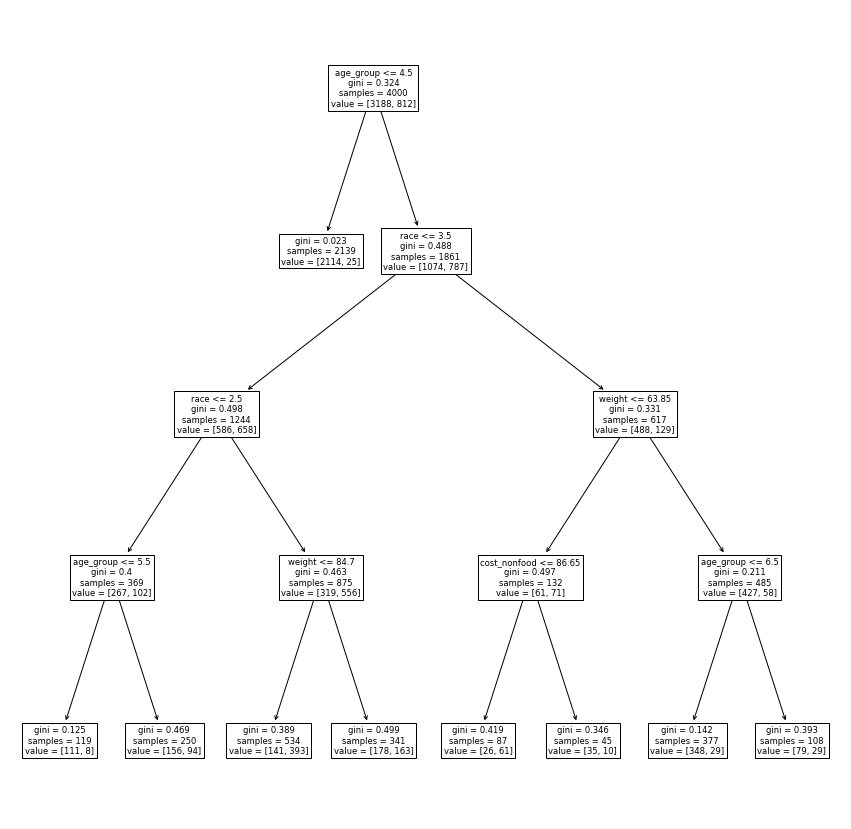

In [92]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.2.7 Random Forest

In [203]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_frax)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
93                1           0.8794                 50                  6   
91                2           0.8780                150                  5   
94                3           0.8768                100                  6   
95                4           0.8756                150                  6   
77                5           0.8744                 50                  6   
..              ...              ...                ...                ...   
13               80           0.7962                 50                  6   
15               80           0.7962                150                  6   
8                80           0.7962                 25                  5   
0                80           0.7962                 25                  3   
17               96           0.7960                 50                  3   

   param_max_depth  
93              15  
91              15  


In [204]:
forest = RandomForestClassifier(n_estimators=50,max_features=6,max_depth=15)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.9998)

       Prediction
Actual    0    1
     0 3187    1
     1    0  812
Confusion Matrix (Accuracy 0.8830)

       Prediction
Actual   0   1
     0 748  45
     1  72 135
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       793
           1       0.75      0.65      0.70       207

    accuracy                           0.88      1000
   macro avg       0.83      0.80      0.81      1000
weighted avg       0.88      0.88      0.88      1000



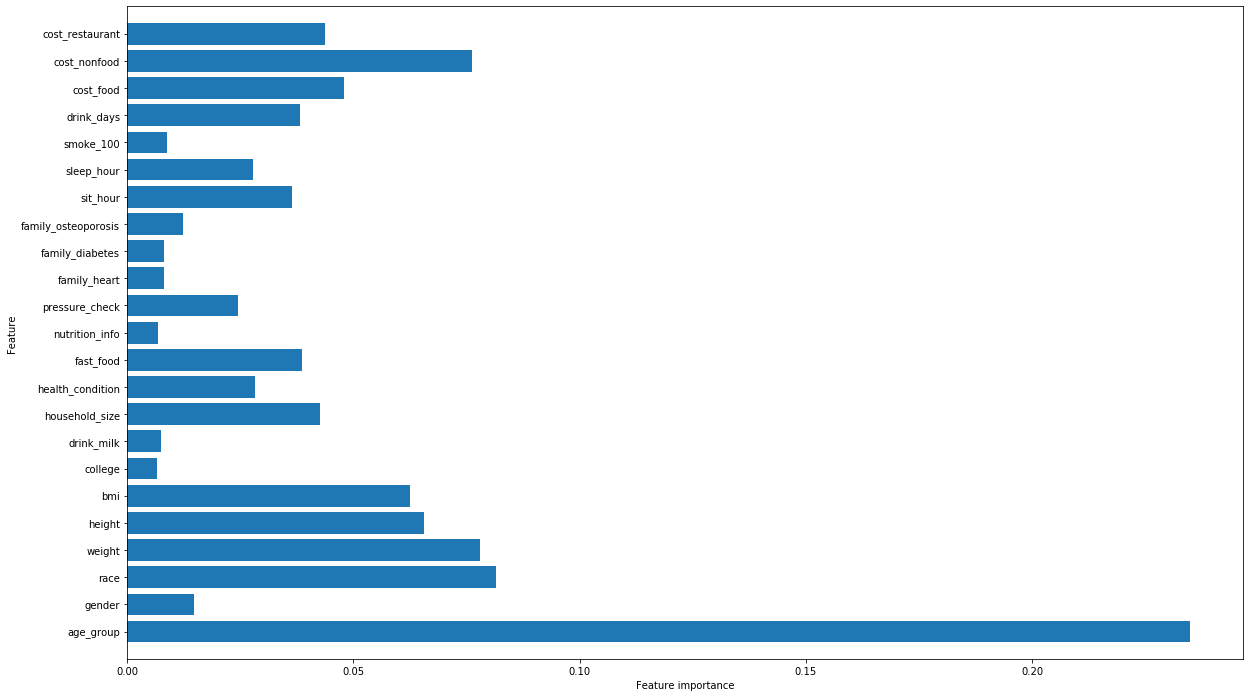

In [205]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.2.8 Neural Network

In [97]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_frax)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [104]:
def get_new_model_class_test():
    model = Sequential()
    model.add(Dense(1000, activation='tanh', input_shape = (n_col,))) 
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(2, activation='softmax')) 
    return(model)

lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6415 - accuracy: 0.7883 - val_loss: 0.6326 - val_accuracy: 0.7970
Epoch 2/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6269 - accuracy: 0.7947 - val_loss: 0.6187 - val_accuracy: 0.8000
Epoch 3/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6141 - accuracy: 0.7952 - val_loss: 0.6063 - val_accuracy: 0.8000
Epoch 4/5
4000/4000 [==============================] - 4s 999us/step - loss: 0.6028 - accuracy: 0.7952 - val_loss: 0.5954 - val_accuracy: 0.8000
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5928 - accuracy: 0.7952 - val_loss: 0.5858 - val_accuracy: 0.8000

Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5215 - accuracy: 0.7908 - val_loss: 0.4770 - va

In [108]:
lr_to_test = [0.05, 0.1, 0.3, 0.5, 0.7]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.2f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.05
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4042 - accuracy: 0.8070 - val_loss: 0.3345 - val_accuracy: 0.8200
Epoch 2/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3439 - accuracy: 0.8390 - val_loss: 0.3458 - val_accuracy: 0.8250
Epoch 3/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3425 - accuracy: 0.8390 - val_loss: 0.3340 - val_accuracy: 0.8240
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3387 - accuracy: 0.8428 - val_loss: 0.3436 - val_accuracy: 0.8350
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3369 - accuracy: 0.8395 - val_loss: 0.3340 - val_accuracy: 0.8330


Current Learning Rate: 0.10
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3981 - accuracy: 0.8148 - val_loss: 0.3344 - val_accur

In [115]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.1)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 4s 954us/step - loss: 0.4007 - accuracy: 0.8133
Epoch 2/5
4000/4000 [==============================] - 4s 910us/step - loss: 0.3491 - accuracy: 0.8322
Epoch 3/5
4000/4000 [==============================] - 4s 918us/step - loss: 0.3422 - accuracy: 0.8332
Epoch 4/5
4000/4000 [==============================] - 4s 914us/step - loss: 0.3354 - accuracy: 0.8403
Epoch 5/5
4000/4000 [==============================] - 4s 920us/step - loss: 0.3355 - accuracy: 0.8357


In [116]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.8475)

       Prediction
Actual    0    1
     0 2854  336
     1  274  536
Confusion Matrix (Accuracy 0.8390)

       Prediction
Actual   0   1
     0 701  90
     1  71 138
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       791
         1.0       0.61      0.66      0.63       209

    accuracy                           0.84      1000
   macro avg       0.76      0.77      0.76      1000
weighted avg       0.84      0.84      0.84      1000



## 4.3 Hypertension

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hypertension, random_state=1, test_size = 0.2)

### 4.3.1 Ridge Logistic

In [156]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_hypertension, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.7601
Test set score: 0.7557

C: 10.00
Training set score: 0.7600
Test set score: 0.7560

C: 1.00
Training set score: 0.7600
Test set score: 0.7558

C: 0.10
Training set score: 0.7600
Test set score: 0.7560

C: 0.01
Training set score: 0.7596
Test set score: 0.7568

C: 0.00
Training set score: 0.7562
Test set score: 0.7560



In [157]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 0.01)')
ridge_logistic = LogisticRegression(penalty="l2", C=0.01)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)


classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 0.01)
Confusion Matrix (Accuracy 0.7605)

       Prediction
Actual    0    1
     0 1950  386
     1  572 1092
Confusion Matrix (Accuracy 0.7580)

       Prediction
Actual   0   1
     0 488  97
     1 145 270
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       585
           1       0.74      0.65      0.69       415

    accuracy                           0.76      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.76      0.76      0.76      1000



### 4.3.2 Lasso Logistic

In [158]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_hypertension, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.7595
Test set score: 0.7551

C: 10.0000
Training set score: 0.7596
Test set score: 0.7554

C: 1.0000
Training set score: 0.7600
Test set score: 0.7559

C: 0.1000
Training set score: 0.7595
Test set score: 0.7561

C: 0.0100
Training set score: 0.7583
Test set score: 0.7567

C: 0.0010
Training set score: 0.7113
Test set score: 0.7114



In [159]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 0.01)')
lasso_logistic = LogisticRegression(penalty="l1", C=0.01)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)


classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 0.01)
Confusion Matrix (Accuracy 0.7635)

       Prediction
Actual    0    1
     0 1976  360
     1  586 1078
Confusion Matrix (Accuracy 0.7510)

       Prediction
Actual   0   1
     0 487  98
     1 151 264
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       585
           1       0.73      0.64      0.68       415

    accuracy                           0.75      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.75      0.75      0.75      1000



### 4.3.3 KNN

In [161]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [30,40,50,60,70,80]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 30.00
Training set accuracy: 0.6837
Test set accuracy: 0.6720

# of neighbors: 40.00
Training set accuracy: 0.6800
Test set accuracy: 0.6780

# of neighbors: 50.00
Training set accuracy: 0.6720
Test set accuracy: 0.6800

# of neighbors: 60.00
Training set accuracy: 0.6715
Test set accuracy: 0.6760

# of neighbors: 70.00
Training set accuracy: 0.6710
Test set accuracy: 0.6680

# of neighbors: 80.00
Training set accuracy: 0.6660
Test set accuracy: 0.6650



In [162]:
knnm = KNeighborsClassifier(n_neighbors=50)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.6720)

       Prediction
Actual    0    1
     0 2139  197
     1 1115  549
Confusion Matrix (Accuracy 0.6800)

       Prediction
Actual   0   1
     0 541  44
     1 276 139
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       585
           1       0.76      0.33      0.46       415

    accuracy                           0.68      1000
   macro avg       0.71      0.63      0.62      1000
weighted avg       0.70      0.68      0.64      1000



## 4.3.4 Naive Bayes

In [163]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_hypertension, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.684630
Test set score: 0.684940

alpha: 1000.00
Training set score: 0.697705
Test set score: 0.699080

alpha: 100.00
Training set score: 0.698668
Test set score: 0.700020

alpha: 10.00
Training set score: 0.698757
Test set score: 0.700120

alpha: 1.00
Training set score: 0.698770
Test set score: 0.700140

alpha: 0.10
Training set score: 0.698770
Test set score: 0.700150

alpha: 0.01
Training set score: 0.698770
Test set score: 0.700150

alpha: 0.00
Training set score: 0.698770
Test set score: 0.700150



In [164]:
nbm = MultinomialNB(alpha=0.1)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.7007)

       Prediction
Actual    0    1
     0 2171  165
     1 1032  632
Confusion Matrix (Accuracy 0.6970)

       Prediction
Actual   0   1
     0 540  45
     1 258 157
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       585
           1       0.78      0.38      0.51       415

    accuracy                           0.70      1000
   macro avg       0.73      0.65      0.64      1000
weighted avg       0.72      0.70      0.67      1000



### 4.3.5 Support Vector Machine¶

In [165]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 100, 'svm__gamma': 0.001}

Testing Accuracy
0.761

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.7748)

       Prediction
Actual    0    1
     0 1970  366
     1  535 1129
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.7610)

       Prediction
Actual   0   1
     0 486  99
     1 140 275
None

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       585
           1       0.74      0.66      0.70       415

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.76      1000



### 4.3.6 Decision Tree

In [166]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
Initial score:  0.746


In [167]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.002, 'min_samples_split': 13}
Improved score:  0.758


In [168]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.7672)

       Prediction
Actual    0    1
     0 1842  494
     1  437 1227
Confusion Matrix (Accuracy 0.7670)

       Prediction
Actual   0   1
     0 458 127
     1 106 309
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       585
           1       0.71      0.74      0.73       415

    accuracy                           0.77      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.77      0.77      0.77      1000



[Text(482.8846153846154, 747.4499999999999, 'age_group <= 4.5\ngini = 0.486\nsamples = 4000\nvalue = [2336, 1664]'),
 Text(257.53846153846155, 611.55, 'pressure_check <= 5.5\ngini = 0.341\nsamples = 2139\nvalue = [1673, 466]'),
 Text(128.76923076923077, 475.65, 'weight <= 98.95\ngini = 0.287\nsamples = 1937\nvalue = [1601, 336]'),
 Text(64.38461538461539, 339.74999999999994, 'gini = 0.24\nsamples = 1625\nvalue = [1398, 227]'),
 Text(193.15384615384616, 339.74999999999994, 'gini = 0.455\nsamples = 312\nvalue = [203, 109]'),
 Text(386.3076923076923, 475.65, 'age_group <= 2.5\ngini = 0.459\nsamples = 202\nvalue = [72, 130]'),
 Text(321.9230769230769, 339.74999999999994, 'bmi <= 33.55\ngini = 0.463\nsamples = 44\nvalue = [28, 16]'),
 Text(257.53846153846155, 203.8499999999999, 'gini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(386.3076923076923, 203.8499999999999, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(450.69230769230774, 339.74999999999994, 'gini = 0.402\nsamples = 158\nv

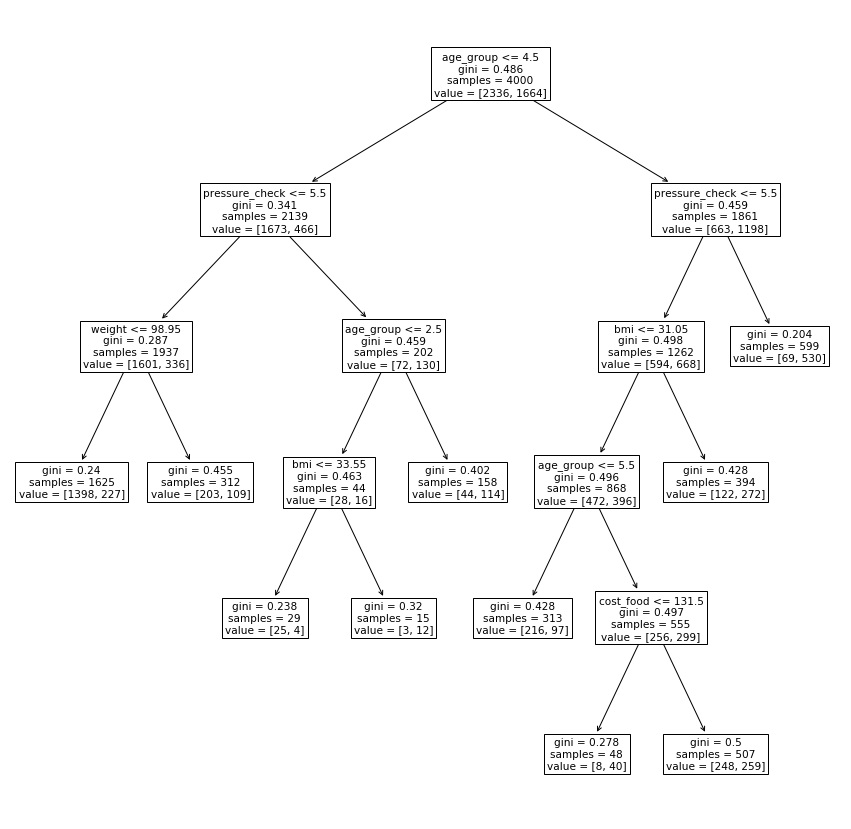

In [169]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.3.7 Random Forest

In [207]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_hypertension)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
59                1           0.7702                150                  5   
43                2           0.7686                150                  5   
53                3           0.7682                 50                  4   
75                3           0.7682                150                  5   
57                5           0.7676                 50                  5   
..              ...              ...                ...                ...   
4                92           0.7342                 25                  4   
2                93           0.7336                100                  3   
3                94           0.7290                150                  3   
1                95           0.7210                 50                  3   
0                96           0.7208                 25                  3   

   param_max_depth  
59               5  
43               4  


In [208]:
forest = RandomForestClassifier(n_estimators=150,max_features=5,max_depth=5)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.7913)

       Prediction
Actual    0    1
     0 2016  320
     1  515 1149
Confusion Matrix (Accuracy 0.7640)

       Prediction
Actual   0   1
     0 491  94
     1 142 273
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       585
           1       0.74      0.66      0.70       415

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.76      1000



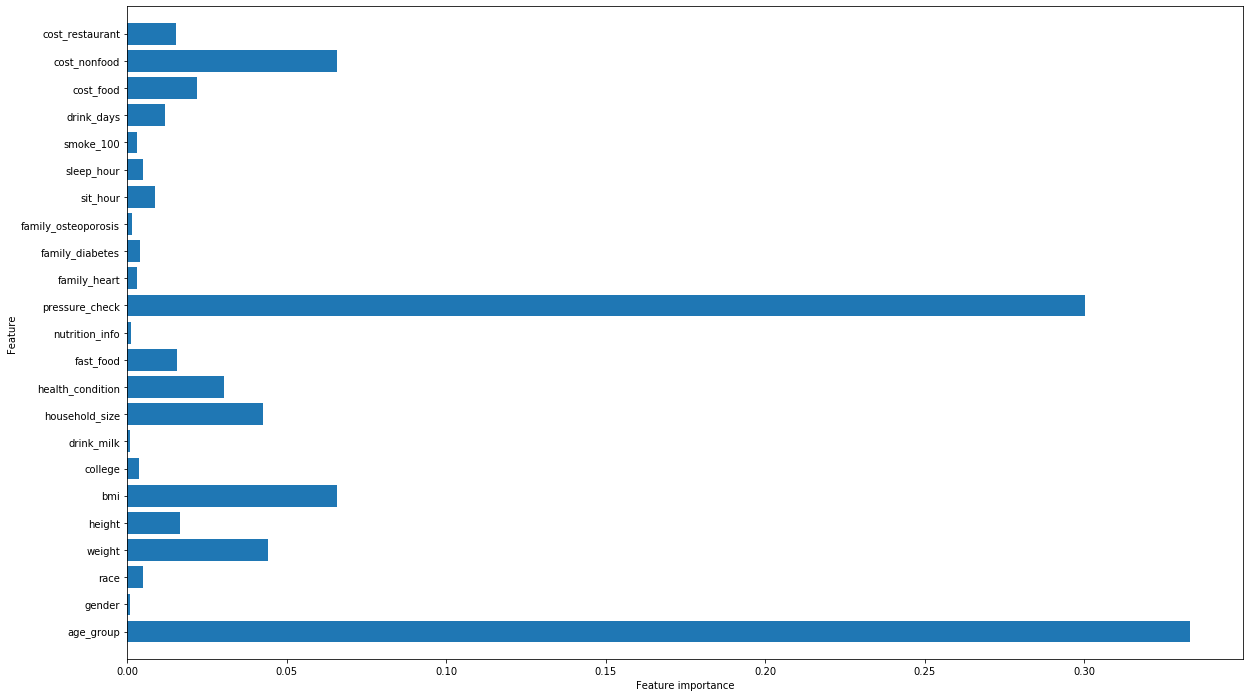

In [209]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.3.8 Neural Network

In [173]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_hypertension)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [174]:
lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7053 - accuracy: 0.4327 - val_loss: 0.7086 - val_accuracy: 0.4110
Epoch 2/5
4000/4000 [==============================] - 4s 975us/step - loss: 0.7017 - accuracy: 0.4430 - val_loss: 0.7043 - val_accuracy: 0.4180
Epoch 3/5
4000/4000 [==============================] - 4s 998us/step - loss: 0.6984 - accuracy: 0.4560 - val_loss: 0.7004 - val_accuracy: 0.4430
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6954 - accuracy: 0.4760 - val_loss: 0.6968 - val_accuracy: 0.4640
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6927 - accuracy: 0.4922 - val_loss: 0.6936 - val_accuracy: 0.4840


Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6636 - accuracy: 0.5907 - val_loss: 0.6245 -

In [175]:
lr_to_test = [0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.4f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.0005
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 993us/step - loss: 0.6802 - accuracy: 0.5633 - val_loss: 0.6593 - val_accuracy: 0.6160
Epoch 2/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6547 - accuracy: 0.6180 - val_loss: 0.6375 - val_accuracy: 0.6580
Epoch 3/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6346 - accuracy: 0.6735 - val_loss: 0.6200 - val_accuracy: 0.7120
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6162 - accuracy: 0.7092 - val_loss: 0.6025 - val_accuracy: 0.7090
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6008 - accuracy: 0.7082 - val_loss: 0.5898 - val_accuracy: 0.7190


Current Learning Rate: 0.0007
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6721 - accuracy: 0.5735 - val_loss: 0.6429 - val

In [177]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.005)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5944 - accuracy: 0.6973
Epoch 2/5
4000/4000 [==============================] - 4s 999us/step - loss: 0.5398 - accuracy: 0.7385
Epoch 3/5
4000/4000 [==============================] - 4s 968us/step - loss: 0.5293 - accuracy: 0.7387
Epoch 4/5
4000/4000 [==============================] - 4s 996us/step - loss: 0.5243 - accuracy: 0.7430
Epoch 5/5
4000/4000 [==============================] - 4s 942us/step - loss: 0.5212 - accuracy: 0.7473


In [178]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.7555)

       Prediction
Actual    0    1
     0 1745  580
     1  398 1277
Confusion Matrix (Accuracy 0.7180)

       Prediction
Actual   0   1
     0 428 168
     1 114 290
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       596
         1.0       0.63      0.72      0.67       404

    accuracy                           0.72      1000
   macro avg       0.71      0.72      0.71      1000
weighted avg       0.73      0.72      0.72      1000



## 4.4 Cholesterol

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cholesterol, random_state=1, test_size = 0.2)

### 4.4.1 Ridge Logistic

In [180]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_cholesterol, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.6628
Test set score: 0.6616

C: 10.00
Training set score: 0.6627
Test set score: 0.6616

C: 1.00
Training set score: 0.6627
Test set score: 0.6616

C: 0.10
Training set score: 0.6627
Test set score: 0.6617

C: 0.01
Training set score: 0.6613
Test set score: 0.6610

C: 0.00
Training set score: 0.6540
Test set score: 0.6537



In [181]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 0.1)')
ridge_logistic = LogisticRegression(penalty="l2", C=0.1)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)


classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 0.1)
Confusion Matrix (Accuracy 0.6625)

       Prediction
Actual    0    1
     0 1508  610
     1  740 1142
Confusion Matrix (Accuracy 0.6680)

       Prediction
Actual   0   1
     0 368 155
     1 177 300
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       523
           1       0.66      0.63      0.64       477

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



### 4.4.2 Lasso Logistic

In [182]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_cholesterol, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.6637
Test set score: 0.6619

C: 10.0000
Training set score: 0.6637
Test set score: 0.6617

C: 1.0000
Training set score: 0.6626
Test set score: 0.6618

C: 0.1000
Training set score: 0.6611
Test set score: 0.6607

C: 0.0100
Training set score: 0.6568
Test set score: 0.6579

C: 0.0010
Training set score: 0.5856
Test set score: 0.5850



In [183]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 100)')
lasso_logistic = LogisticRegression(penalty="l1", C=100)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)


classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 100)
Confusion Matrix (Accuracy 0.6625)

       Prediction
Actual    0    1
     0 1506  612
     1  738 1144
Confusion Matrix (Accuracy 0.6690)

       Prediction
Actual   0   1
     0 371 152
     1 179 298
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       523
           1       0.66      0.62      0.64       477

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



### 4.4.3 KNN

In [185]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [15,16,17,18,19,20,21,22,23,24,25]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 15.00
Training set accuracy: 0.6340
Test set accuracy: 0.5610

# of neighbors: 16.00
Training set accuracy: 0.6350
Test set accuracy: 0.5490

# of neighbors: 17.00
Training set accuracy: 0.6262
Test set accuracy: 0.5630

# of neighbors: 18.00
Training set accuracy: 0.6322
Test set accuracy: 0.5620

# of neighbors: 19.00
Training set accuracy: 0.6280
Test set accuracy: 0.5730

# of neighbors: 20.00
Training set accuracy: 0.6280
Test set accuracy: 0.5740

# of neighbors: 21.00
Training set accuracy: 0.6230
Test set accuracy: 0.5740

# of neighbors: 22.00
Training set accuracy: 0.6272
Test set accuracy: 0.5720

# of neighbors: 23.00
Training set accuracy: 0.6220
Test set accuracy: 0.5720

# of neighbors: 24.00
Training set accuracy: 0.6268
Test set accuracy: 0.5580

# of neighbors: 25.00
Training set accuracy: 0.6160
Test set accuracy: 0.5710



In [186]:
knnm = KNeighborsClassifier(n_neighbors=20)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.6280)

       Prediction
Actual    0    1
     0 1687  431
     1 1057  825
Confusion Matrix (Accuracy 0.5740)

       Prediction
Actual   0   1
     0 386 137
     1 289 188
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       523
           1       0.58      0.39      0.47       477

    accuracy                           0.57      1000
   macro avg       0.58      0.57      0.56      1000
weighted avg       0.58      0.57      0.56      1000



## 4.4.4 Naive Bayes

In [187]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_cholesterol, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.570263
Test set score: 0.572140

alpha: 1000.00
Training set score: 0.573060
Test set score: 0.575620

alpha: 100.00
Training set score: 0.573398
Test set score: 0.575990

alpha: 10.00
Training set score: 0.573465
Test set score: 0.576090

alpha: 1.00
Training set score: 0.573485
Test set score: 0.576100

alpha: 0.10
Training set score: 0.573485
Test set score: 0.576110

alpha: 0.01
Training set score: 0.573485
Test set score: 0.576110

alpha: 0.00
Training set score: 0.573485
Test set score: 0.576110



In [188]:
nbm = MultinomialNB(alpha=1)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.5755)

       Prediction
Actual    0    1
     0 1849  269
     1 1429  453
Confusion Matrix (Accuracy 0.5810)

       Prediction
Actual   0   1
     0 462  61
     1 358 119
              precision    recall  f1-score   support

           0       0.56      0.88      0.69       523
           1       0.66      0.25      0.36       477

    accuracy                           0.58      1000
   macro avg       0.61      0.57      0.53      1000
weighted avg       0.61      0.58      0.53      1000



### 4.4.5 Support Vector Machine¶

In [189]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 1, 'svm__gamma': 0.01}

Testing Accuracy
0.675

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.6875)

       Prediction
Actual    0    1
     0 1464  654
     1  596 1286
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.6750)

       Prediction
Actual   0   1
     0 350 173
     1 152 325
None

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       523
           1       0.65      0.68      0.67       477

    accuracy                           0.68      1000
   macro avg       0.67      0.68      0.67      1000
weighted avg       0.68      0.68      0.68      1000



### 4.4.6 Decision Tree

In [190]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
Initial score:  0.66225


In [191]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 5}
Improved score:  0.66225


In [192]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.6623)

       Prediction
Actual    0    1
     0 1453  665
     1  686 1196
Confusion Matrix (Accuracy 0.6660)

       Prediction
Actual   0   1
     0 358 165
     1 169 308
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       523
           1       0.65      0.65      0.65       477

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



[Text(418.5, 679.5, 'age_group <= 3.5\ngini = 0.498\nsamples = 4000\nvalue = [2118, 1882]'),
 Text(209.25, 407.69999999999993, 'age_group <= 2.5\ngini = 0.367\nsamples = 1344\nvalue = [1018, 326]'),
 Text(104.625, 135.89999999999998, 'gini = 0.285\nsamples = 743\nvalue = [615, 128]'),
 Text(313.875, 135.89999999999998, 'gini = 0.442\nsamples = 601\nvalue = [403, 198]'),
 Text(627.75, 407.69999999999993, 'age_group <= 4.5\ngini = 0.485\nsamples = 2656\nvalue = [1100, 1556]'),
 Text(523.125, 135.89999999999998, 'gini = 0.496\nsamples = 795\nvalue = [435, 360]'),
 Text(732.375, 135.89999999999998, 'gini = 0.459\nsamples = 1861\nvalue = [665, 1196]')]

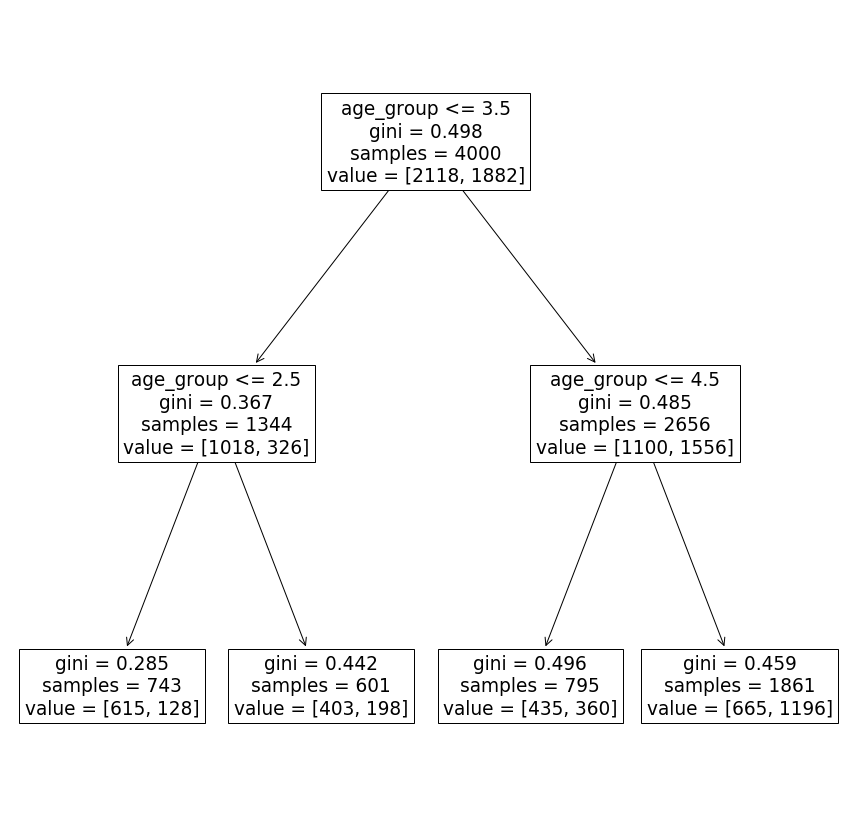

In [193]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.4.7 Random Forest

In [194]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_cholesterol)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
61                1           0.6724                 50                  6   
79                1           0.6724                150                  6   
63                3           0.6714                150                  6   
57                4           0.6706                 50                  5   
43                5           0.6704                150                  5   
..              ...              ...                ...                ...   
3                92           0.6446                150                  3   
80               93           0.6432                 25                  3   
4                94           0.6426                 25                  4   
1                95           0.6418                 50                  3   
2                96           0.6412                100                  3   

   param_max_depth  
61               5  
79              10  


In [195]:
forest = RandomForestClassifier(n_estimators=50,max_features=6,max_depth=5)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.6977)

       Prediction
Actual    0    1
     0 1464  654
     1  555 1327
Confusion Matrix (Accuracy 0.6880)

       Prediction
Actual   0   1
     0 356 167
     1 145 332
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       523
           1       0.67      0.70      0.68       477

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [ ]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.4.8 Neural Network

In [197]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_cholesterol)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [198]:
lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.7043 - accuracy: 0.5300 - val_loss: 0.7127 - val_accuracy: 0.4990
Epoch 2/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7037 - accuracy: 0.5297 - val_loss: 0.7118 - val_accuracy: 0.4990
Epoch 3/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7032 - accuracy: 0.5290 - val_loss: 0.7111 - val_accuracy: 0.4980
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7026 - accuracy: 0.5288 - val_loss: 0.7103 - val_accuracy: 0.4970
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7021 - accuracy: 0.5272 - val_loss: 0.7096 - val_accuracy: 0.4950


Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6883 - accuracy: 0.5343 - val_loss: 0.6821 - val

In [199]:
lr_to_test = [0.05, 0.1, 0.3, 0.5, 0.7]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.2f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.05
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6581 - accuracy: 0.6137 - val_loss: 0.6552 - val_accuracy: 0.6730
Epoch 2/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6394 - accuracy: 0.6463 - val_loss: 0.6421 - val_accuracy: 0.6200
Epoch 3/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6365 - accuracy: 0.6457 - val_loss: 0.6212 - val_accuracy: 0.6540
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6324 - accuracy: 0.6510 - val_loss: 0.6219 - val_accuracy: 0.6480
Epoch 5/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6302 - accuracy: 0.6518 - val_loss: 0.6274 - val_accuracy: 0.6480


Current Learning Rate: 0.10
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6674 - accuracy: 0.6127 - val_loss: 0.6215 - val_accur

In [200]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.1)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6751 - accuracy: 0.6168
Epoch 2/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6419 - accuracy: 0.6463
Epoch 3/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6333 - accuracy: 0.6465
Epoch 4/5
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6327 - accuracy: 0.6510
Epoch 5/5
4000/4000 [==============================] - 4s 953us/step - loss: 0.6315 - accuracy: 0.6510


In [201]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.6630)

       Prediction
Actual    0    1
     0 1363  736
     1  612 1289
Confusion Matrix (Accuracy 0.6660)

       Prediction
Actual   0   1
     0 352 190
     1 144 314
              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       542
         1.0       0.62      0.69      0.65       458

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



## 4.5 Diabetes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, random_state=1, test_size = 0.2)

### 4.5.1 Ridge Logistic

In [211]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_diabetes, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.8573
Test set score: 0.8531

C: 10.00
Training set score: 0.8574
Test set score: 0.8530

C: 1.00
Training set score: 0.8573
Test set score: 0.8531

C: 0.10
Training set score: 0.8562
Test set score: 0.8526

C: 0.01
Training set score: 0.8524
Test set score: 0.8488

C: 0.00
Training set score: 0.8449
Test set score: 0.8430



In [212]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 1)')
ridge_logistic = LogisticRegression(penalty="l2", C=1)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)


classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 1)
Confusion Matrix (Accuracy 0.8582)

       Prediction
Actual    0    1
     0 3287  100
     1  467  146
Confusion Matrix (Accuracy 0.8440)

       Prediction
Actual   0   1
     0 810  24
     1 132  34
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       834
           1       0.59      0.20      0.30       166

    accuracy                           0.84      1000
   macro avg       0.72      0.59      0.61      1000
weighted avg       0.81      0.84      0.81      1000



### 4.5.2 Lasso Logistic

In [213]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_diabetes, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.8577
Test set score: 0.8531

C: 10.0000
Training set score: 0.8577
Test set score: 0.8531

C: 1.0000
Training set score: 0.8575
Test set score: 0.8533

C: 0.1000
Training set score: 0.8557
Test set score: 0.8526

C: 0.0100
Training set score: 0.8464
Test set score: 0.8443

C: 0.0010
Training set score: 0.8440
Test set score: 0.8422



In [16]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 1)')
lasso_logistic = LogisticRegression(penalty="l1", C=1)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)


classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 1)
Confusion Matrix (Accuracy 0.8585)

       Prediction
Actual    0    1
     0 3291   88
     1  478  143
Confusion Matrix (Accuracy 0.8560)

       Prediction
Actual   0   1
     0 824  24
     1 120  32
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       848
           1       0.57      0.21      0.31       152

    accuracy                           0.86      1000
   macro avg       0.72      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000



### 4.5.3 KNN

In [19]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [6,8,9,10,11,12,14]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 6.00
Training set accuracy: 0.8505
Test set accuracy: 0.8400

# of neighbors: 8.00
Training set accuracy: 0.8485
Test set accuracy: 0.8440

# of neighbors: 9.00
Training set accuracy: 0.8480
Test set accuracy: 0.8410

# of neighbors: 10.00
Training set accuracy: 0.8482
Test set accuracy: 0.8500

# of neighbors: 11.00
Training set accuracy: 0.8490
Test set accuracy: 0.8470

# of neighbors: 12.00
Training set accuracy: 0.8472
Test set accuracy: 0.8450

# of neighbors: 14.00
Training set accuracy: 0.8478
Test set accuracy: 0.8450



In [20]:
knnm = KNeighborsClassifier(n_neighbors=10)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.8482)

       Prediction
Actual    0    1
     0 3362   17
     1  590   31
Confusion Matrix (Accuracy 0.8500)

       Prediction
Actual   0   1
     0 842   6
     1 144   8
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       848
           1       0.57      0.05      0.10       152

    accuracy                           0.85      1000
   macro avg       0.71      0.52      0.51      1000
weighted avg       0.81      0.85      0.79      1000



## 4.5.4 Naive Bayes

In [23]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_diabetes, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.823657
Test set score: 0.822430

alpha: 1000.00
Training set score: 0.787730
Test set score: 0.785250

alpha: 100.00
Training set score: 0.787360
Test set score: 0.784880

alpha: 10.00
Training set score: 0.789077
Test set score: 0.786940

alpha: 1.00
Training set score: 0.789255
Test set score: 0.787240

alpha: 0.10
Training set score: 0.789273
Test set score: 0.787230

alpha: 0.01
Training set score: 0.789275
Test set score: 0.787260

alpha: 0.00
Training set score: 0.789275
Test set score: 0.787260



In [41]:
nbm = MultinomialNB(alpha=10)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.7875)

       Prediction
Actual    0    1
     0 2968  411
     1  439  182
Confusion Matrix (Accuracy 0.8010)

       Prediction
Actual   0   1
     0 750  98
     1 101  51
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       848
           1       0.34      0.34      0.34       152

    accuracy                           0.80      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.80      0.80      0.80      1000



### 4.5.5 Support Vector Machine¶

In [42]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 10, 'svm__gamma': 0.01}

Testing Accuracy
0.846

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.8662)

       Prediction
Actual    0    1
     0 3363   16
     1  519  102
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.8460)

       Prediction
Actual   0   1
     0 837  11
     1 143   9
None

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       848
           1       0.45      0.06      0.10       152

    accuracy                           0.85      1000
   macro avg       0.65      0.52      0.51      1000
weighted avg       0.79      0.85      0.79      1000



### 4.5.6 Decision Tree

In [43]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Initial score:  0.85825


In [47]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.002, 0.003], 
    'min_samples_split': [3,4,5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 3}
Improved score:  0.85825


In [49]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.8665)

       Prediction
Actual    0    1
     0 3278  101
     1  433  188
Confusion Matrix (Accuracy 0.8380)

       Prediction
Actual   0   1
     0 811  37
     1 125  27
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       848
           1       0.42      0.18      0.25       152

    accuracy                           0.84      1000
   macro avg       0.64      0.57      0.58      1000
weighted avg       0.80      0.84      0.81      1000



[Text(353.73214285714283, 747.4499999999999, 'age_group <= 4.5\ngini = 0.262\nsamples = 4000\nvalue = [3379, 621]'),
 Text(159.42857142857142, 611.55, 'family_diabetes <= 0.5\ngini = 0.121\nsamples = 2155\nvalue = [2015, 140]'),
 Text(79.71428571428571, 475.65, 'weight <= 162.75\ngini = 0.056\nsamples = 1317\nvalue = [1279, 38]'),
 Text(39.857142857142854, 339.74999999999994, 'gini = 0.049\nsamples = 1307\nvalue = [1274, 33]'),
 Text(119.57142857142856, 339.74999999999994, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(239.1428571428571, 475.65, 'age_group <= 3.5\ngini = 0.214\nsamples = 838\nvalue = [736, 102]'),
 Text(199.28571428571428, 339.74999999999994, 'gini = 0.112\nsamples = 486\nvalue = [457, 29]'),
 Text(279.0, 339.74999999999994, 'height <= 147.2\ngini = 0.329\nsamples = 352\nvalue = [279, 73]'),
 Text(239.1428571428571, 203.8499999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(318.85714285714283, 203.8499999999999, 'health_condition <= 3.5\ngini = 0.318\nsam

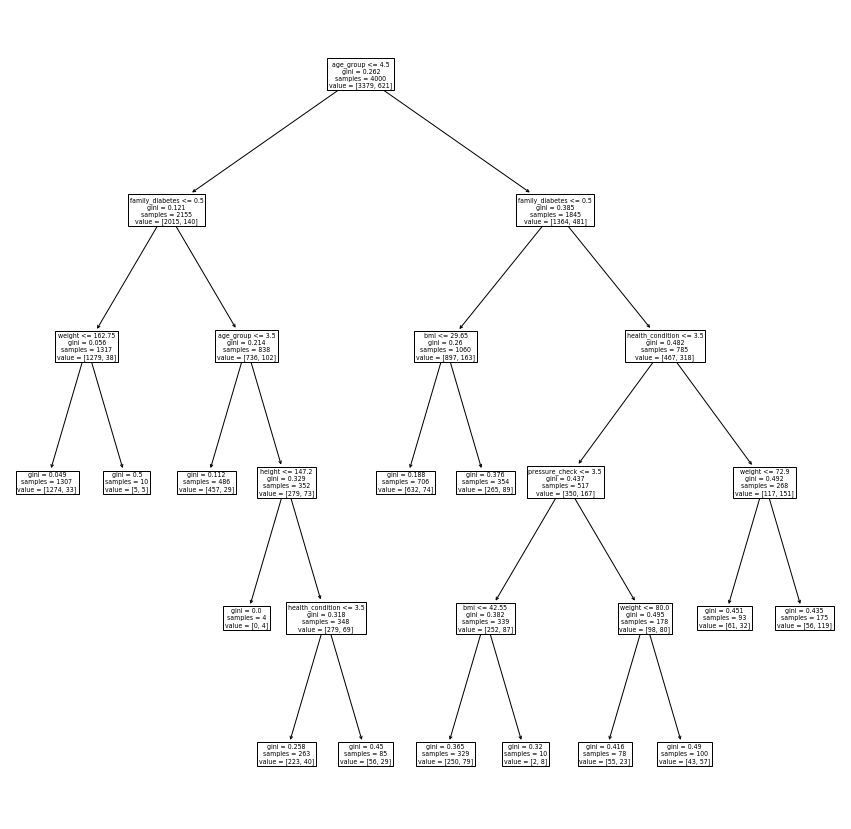

In [50]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.5.7 Random Forest

In [51]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_diabetes)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
79                1           0.8552                150                  6   
95                2           0.8548                150                  6   
78                3           0.8542                100                  6   
74                4           0.8534                100                  5   
91                5           0.8526                150                  5   
..              ...              ...                ...                ...   
32               92           0.8452                 25                  3   
36               92           0.8452                 25                  4   
88               94           0.8450                 25                  5   
92               95           0.8444                 25                  6   
84               96           0.8428                 25                  4   

   param_max_depth  
79              10  
95              15  


In [52]:
forest = RandomForestClassifier(n_estimators=150,max_features=6,max_depth=10)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.9423)

       Prediction
Actual    0    1
     0 3379    0
     1  231  390
Confusion Matrix (Accuracy 0.8540)

       Prediction
Actual   0   1
     0 832  16
     1 130  22
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       848
           1       0.58      0.14      0.23       152

    accuracy                           0.85      1000
   macro avg       0.72      0.56      0.58      1000
weighted avg       0.82      0.85      0.81      1000



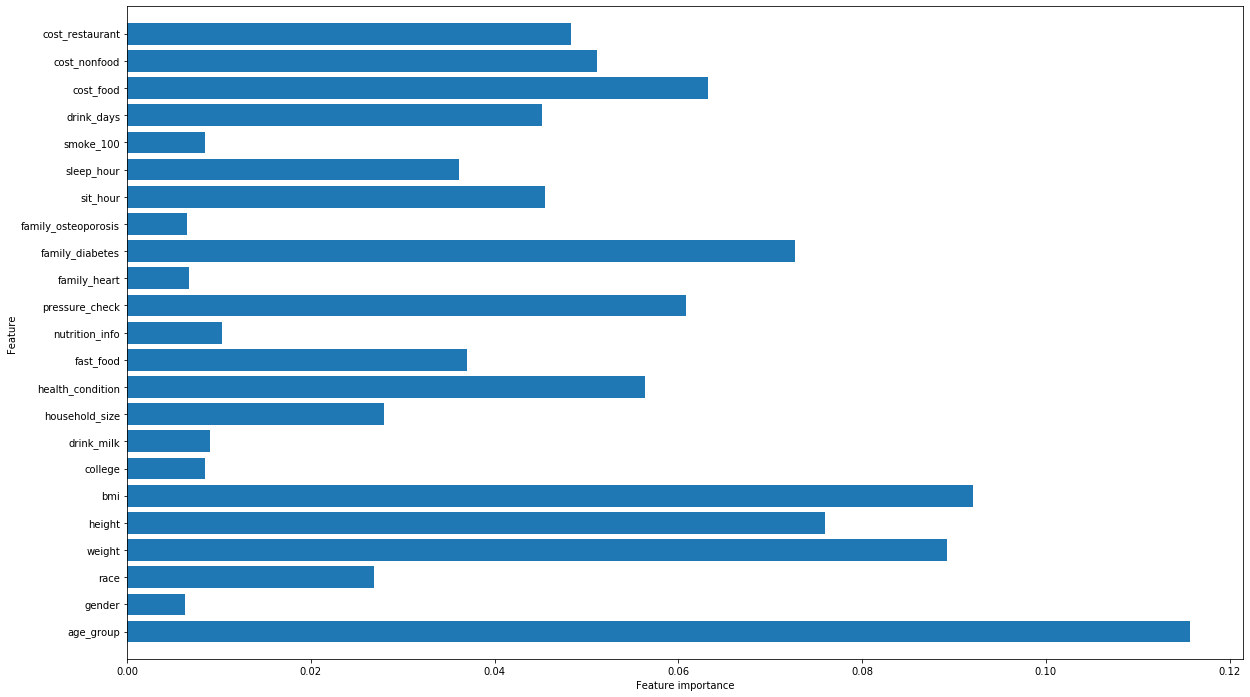

In [53]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.5.8 Neural Network

In [54]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_diabetes)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [55]:
lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.7186 - accuracy: 0.2970 - val_loss: 0.7003 - val_accuracy: 0.4460
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6876 - accuracy: 0.5702 - val_loss: 0.6704 - val_accuracy: 0.7360
Epoch 3/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6605 - accuracy: 0.7638 - val_loss: 0.6443 - val_accuracy: 0.8190
Epoch 4/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6368 - accuracy: 0.8255 - val_loss: 0.6214 - val_accuracy: 0.8410
Epoch 5/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6160 - accuracy: 0.8407 - val_loss: 0.6013 - val_accuracy: 0.8490


Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.4744 - accuracy: 0.8378 - val_loss: 0.4249

In [57]:
lr_to_test = [0.0005, 0.001, 0.01, 0.05]
# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.4f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.0500
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3964 - accuracy: 0.8363 - val_loss: 0.3507 - val_accuracy: 0.8560
Epoch 2/5
4000/4000 [==============================] - 14s 4ms/step - loss: 0.3628 - accuracy: 0.8485 - val_loss: 0.3846 - val_accuracy: 0.8160
Epoch 3/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3536 - accuracy: 0.8462 - val_loss: 0.3624 - val_accuracy: 0.8510
Epoch 4/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3512 - accuracy: 0.8480 - val_loss: 0.3386 - val_accuracy: 0.8580
Epoch 5/5
4000/4000 [==============================] - 14s 3ms/step - loss: 0.3502 - accuracy: 0.8460 - val_loss: 0.3458 - val_accuracy: 0.8550




In [58]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.01)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.3915 - accuracy: 0.8425
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.3605 - accuracy: 0.8500
Epoch 3/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.3521 - accuracy: 0.8537
Epoch 4/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3469 - accuracy: 0.8537
Epoch 5/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3453 - accuracy: 0.8547


In [59]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.8532)

       Prediction
Actual    0    1
     0 3394    9
     1  578   19
Confusion Matrix (Accuracy 0.8310)

       Prediction
Actual   0   1
     0 823   1
     1 168   8
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       824
         1.0       0.89      0.05      0.09       176

    accuracy                           0.83      1000
   macro avg       0.86      0.52      0.50      1000
weighted avg       0.84      0.83      0.76      1000



## 4.6 Oral Health

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oral, random_state=1, test_size = 0.2)

### 4.6.1 Ridge Logistic

In [61]:
shuffle = ShuffleSplit(n_splits=100, test_size=.2, random_state=1)

for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l2", C=Cval)
    # trainFit = model.fit(X_train,y_train)
    print("C: {:.2f}".format(Cval))
    CVInfo = cross_validate(model, X, y_oral, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.00
Training set score: 0.6059
Test set score: 0.5969

C: 10.00
Training set score: 0.6058
Test set score: 0.5972

C: 1.00
Training set score: 0.6059
Test set score: 0.5971

C: 0.10
Training set score: 0.6063
Test set score: 0.5975

C: 0.01
Training set score: 0.6045
Test set score: 0.5971

C: 0.00
Training set score: 0.5917
Test set score: 0.5857



In [62]:
print('Classification Reprot for the best parameter of Ridge Logistic model(C = 0.1)')
ridge_logistic = LogisticRegression(penalty="l2", C=0.1)
ridge_logistic_fit = ridge_logistic.fit(X_train,y_train)


classificationSummary(y_train, ridge_logistic_fit.predict(X_train))
classificationSummary(y_test, ridge_logistic_fit.predict(X_test))
print(classification_report(y_test,ridge_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Ridge Logistic model(C = 0.1)
Confusion Matrix (Accuracy 0.6080)

       Prediction
Actual    0    1
     0 1236  793
     1  775 1196
Confusion Matrix (Accuracy 0.5990)

       Prediction
Actual   0   1
     0 287 217
     1 184 312
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       504
           1       0.59      0.63      0.61       496

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000



### 4.6.2 Lasso Logistic

In [79]:
for Cval in [100.,10., 1., 0.1, 0.01, 0.001]:
    model = LogisticRegression(penalty="l1", C=Cval)
    trainFit = model.fit(X_train,y_train)
    print("C: {:.4f}".format(Cval))
    CVInfo = cross_validate(model, X, y_oral, cv=shuffle,return_train_score=True)
    print("Training set score: {:.4f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.4f}".format(np.mean(CVInfo['test_score'])))
    print()

C: 100.0000
Training set score: 0.6055
Test set score: 0.5967

C: 10.0000
Training set score: 0.6056
Test set score: 0.5969

C: 1.0000
Training set score: 0.6060
Test set score: 0.5973

C: 0.1000
Training set score: 0.6053
Test set score: 0.5974

C: 0.0100
Training set score: 0.5808
Test set score: 0.5739

C: 0.0010
Training set score: 0.5475
Test set score: 0.5465



In [80]:
print('Classification Reprot for the best parameter of Lasso Logistic model(C = 1)')
lasso_logistic = LogisticRegression(penalty="l1", C=1)
lasso_logistic_fit = lasso_logistic.fit(X_train,y_train)


classificationSummary(y_train, lasso_logistic_fit.predict(X_train))
classificationSummary(y_test, lasso_logistic_fit.predict(X_test))
print(classification_report(y_test,lasso_logistic_fit.predict(X_test)))

Classification Reprot for the best parameter of Lasso Logistic model(C = 1)
Confusion Matrix (Accuracy 0.6092)

       Prediction
Actual    0    1
     0 1236  793
     1  770 1201
Confusion Matrix (Accuracy 0.5980)

       Prediction
Actual   0   1
     0 287 217
     1 185 311
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       504
           1       0.59      0.63      0.61       496

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000



### 4.6.3 KNN

In [64]:
#n_neighbors_list = [1,5,10,15,20,50,100,200,300]
n_neighbors_list = [3,4,5,6,7,8]
for i in n_neighbors_list:
    reg = KNeighborsClassifier(n_neighbors=i)
    reg.fit(X_train, y_train)
    print("# of neighbors: {:.2f}".format(i))
    print("Training set accuracy: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test set accuracy: {:.4f}".format(reg.score(X_test, y_test)))
#    print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
    print()

# of neighbors: 3.00
Training set accuracy: 0.7692
Test set accuracy: 0.5100

# of neighbors: 4.00
Training set accuracy: 0.6977
Test set accuracy: 0.5110

# of neighbors: 5.00
Training set accuracy: 0.7003
Test set accuracy: 0.5340

# of neighbors: 6.00
Training set accuracy: 0.6685
Test set accuracy: 0.5140

# of neighbors: 7.00
Training set accuracy: 0.6673
Test set accuracy: 0.5070

# of neighbors: 8.00
Training set accuracy: 0.6512
Test set accuracy: 0.5100



In [66]:
knnm = KNeighborsClassifier(n_neighbors=5)
knn1=knnm.fit(X_train,y_train)
    
classificationSummary(y_train, knn1.predict(X_train))
classificationSummary(y_test, knn1.predict(X_test))

print(classification_report(y_test, knn1.predict(X_test)))

Confusion Matrix (Accuracy 0.7003)

       Prediction
Actual    0    1
     0 1458  571
     1  628 1343
Confusion Matrix (Accuracy 0.5340)

       Prediction
Actual   0   1
     0 273 231
     1 235 261
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       504
           1       0.53      0.53      0.53       496

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



## 4.6.4 Naive Bayes

In [67]:
for ap in [10000, 1000, 100.,10., 1., 0.1, 0.01, 0.001]:
    model = MultinomialNB(alpha=ap)
    trainFit = model.fit(X_train,y_train)
    print("alpha: {:.2f}".format(ap))
    CVInfo = cross_validate(model, X, y_oral, cv=shuffle,return_train_score=True)
    print("Training set score: {:.6f}".format(np.mean(CVInfo['train_score'])))
    print("Test set score: {:.6f}".format(np.mean(CVInfo['test_score'])))
    print()

alpha: 10000.00
Training set score: 0.543390
Test set score: 0.542800

alpha: 1000.00
Training set score: 0.544445
Test set score: 0.543860

alpha: 100.00
Training set score: 0.544832
Test set score: 0.543950

alpha: 10.00
Training set score: 0.545015
Test set score: 0.544170

alpha: 1.00
Training set score: 0.545060
Test set score: 0.544230

alpha: 0.10
Training set score: 0.545067
Test set score: 0.544230

alpha: 0.01
Training set score: 0.545070
Test set score: 0.544230

alpha: 0.00
Training set score: 0.545070
Test set score: 0.544230



In [68]:
nbm = MultinomialNB(alpha=1)
nb=nbm.fit(X_train,y_train)
    
classificationSummary(y_train, nb.predict(X_train))
classificationSummary(y_test, nb.predict(X_test))
print(classification_report(y_test, nb.predict(X_test)))

Confusion Matrix (Accuracy 0.5480)

       Prediction
Actual    0    1
     0  917 1112
     1  696 1275
Confusion Matrix (Accuracy 0.5360)

       Prediction
Actual   0   1
     0 212 292
     1 172 324
              precision    recall  f1-score   support

           0       0.55      0.42      0.48       504
           1       0.53      0.65      0.58       496

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.53      1000
weighted avg       0.54      0.54      0.53      1000



### 4.6.5 Support Vector Machine¶

In [69]:
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)
parameters = {'svm__C':[0.1, 1, 10, 100],
              'svm__gamma':[0.001, 0.01,0.1, 1, 10]}

cv_svm = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print('SVM')
print()
print('Best Parameters')
print(cv_svm.best_params_)
print()
print('Testing Accuracy')
print(cv_svm.score(X_test, y_test))
print()
print('Confusion Matrix (Training)')
print(classificationSummary(y_train, cv_svm.predict(X_train)))
print()
print('Confusion Matrix (Testing)')
print(classificationSummary(y_test, cv_svm.predict(X_test)))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))

SVM

Best Parameters
{'svm__C': 1, 'svm__gamma': 0.01}

Testing Accuracy
0.612

Confusion Matrix (Training)
Confusion Matrix (Accuracy 0.6335)

       Prediction
Actual    0    1
     0 1289  740
     1  726 1245
None

Confusion Matrix (Testing)
Confusion Matrix (Accuracy 0.6120)

       Prediction
Actual   0   1
     0 292 212
     1 176 320
None

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       504
           1       0.60      0.65      0.62       496

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



### 4.6.6 Decision Tree

In [70]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Initial score:  0.58675


In [72]:
param_grid = {
    'max_depth': [ 6, 7, 8, 9, 10, 11, 12,13,14], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.002, 0.003, 0.005], 
    'min_samples_split': [5,8,10,13,15], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

classTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 15}
Improved score:  0.587


In [73]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_test, classTree.predict(X_test))
print(classification_report(y_test, classTree.predict(X_test)))

Confusion Matrix (Accuracy 0.6332)

       Prediction
Actual    0    1
     0 1351  678
     1  789 1182
Confusion Matrix (Accuracy 0.5620)

       Prediction
Actual   0   1
     0 298 206
     1 232 264
              precision    recall  f1-score   support

           0       0.56      0.59      0.58       504
           1       0.56      0.53      0.55       496

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000



[Text(496.96875, 770.1, 'college <= 0.5\ngini = 0.5\nsamples = 4000\nvalue = [2029, 1971]'),
 Text(326.953125, 679.5, 'smoke_100 <= 0.5\ngini = 0.497\nsamples = 2991\nvalue = [1373, 1618]'),
 Text(196.171875, 588.9, 'bmi <= 33.55\ngini = 0.5\nsamples = 1542\nvalue = [791, 751]'),
 Text(130.78125, 498.3, 'health_condition <= 3.5\ngini = 0.496\nsamples = 1187\nvalue = [649, 538]'),
 Text(104.625, 407.7, 'gender <= 1.5\ngini = 0.49\nsamples = 957\nvalue = [547, 410]'),
 Text(52.3125, 317.1, 'weight <= 84.8\ngini = 0.5\nsamples = 384\nvalue = [197, 187]'),
 Text(26.15625, 226.5, 'gini = 0.494\nsamples = 230\nvalue = [102, 128]'),
 Text(78.46875, 226.5, 'height <= 173.2\ngini = 0.473\nsamples = 154\nvalue = [95, 59]'),
 Text(52.3125, 135.89999999999998, 'gini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(104.625, 135.89999999999998, 'height <= 177.85\ngini = 0.437\nsamples = 121\nvalue = [82, 39]'),
 Text(78.46875, 45.30000000000007, 'gini = 0.19\nsamples = 47\nvalue = [42, 5]'),
 Text(1

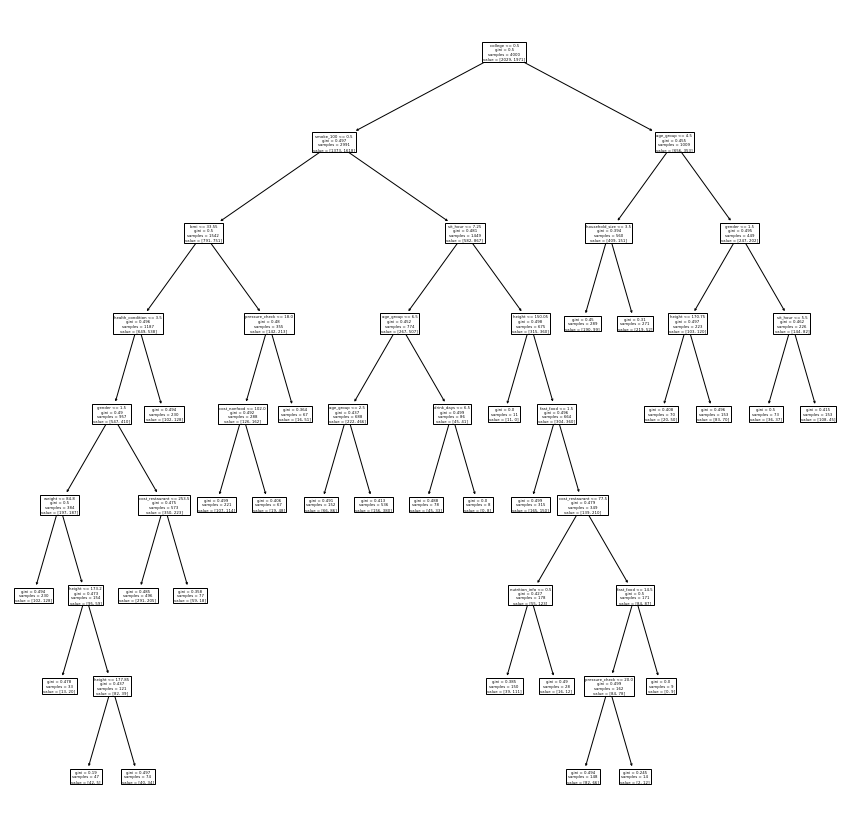

In [74]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15))
#plot_tree(regTree, feature_names=X_train.columns)
plot_tree(classTree, feature_names=X_train.columns, rotate=True)

### 4.6.7 Random Forest

In [75]:
# set up dictionary for grid search
param_grid={'n_estimators':[25,50,100,150], 'max_features':[3,4,5,6], 'max_depth': [2,3,4,5,10,15]}
# set up cross-validation shuffles
# set up search
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
# implement search
grid_search.fit(X,y_oral)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_features','param_max_depth']].sort_values(by = ['rank_test_score']))

    rank_test_score  mean_test_score param_n_estimators param_max_features  \
65                1           0.6134                 50                  3   
58                2           0.6120                100                  5   
90                3           0.6116                100                  5   
50                3           0.6116                100                  3   
32                5           0.6112                 25                  3   
..              ...              ...                ...                ...   
93               91           0.5950                 50                  6   
76               93           0.5940                 25                  6   
81               94           0.5928                 50                  3   
84               95           0.5924                 25                  4   
80               96           0.5898                 25                  3   

   param_max_depth  
65              10  
58               5  


In [76]:
forest = RandomForestClassifier(n_estimators=50,max_features=3,max_depth=10)
Forest=forest.fit(X_train, y_train)

classificationSummary(y_train, Forest.predict(X_train))
classificationSummary(y_test, Forest.predict(X_test))

print(classification_report(y_test, Forest.predict(X_test)))

Confusion Matrix (Accuracy 0.9035)

       Prediction
Actual    0    1
     0 1857  172
     1  214 1757
Confusion Matrix (Accuracy 0.5900)

       Prediction
Actual   0   1
     0 296 208
     1 202 294
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       504
           1       0.59      0.59      0.59       496

    accuracy                           0.59      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.59      0.59      0.59      1000



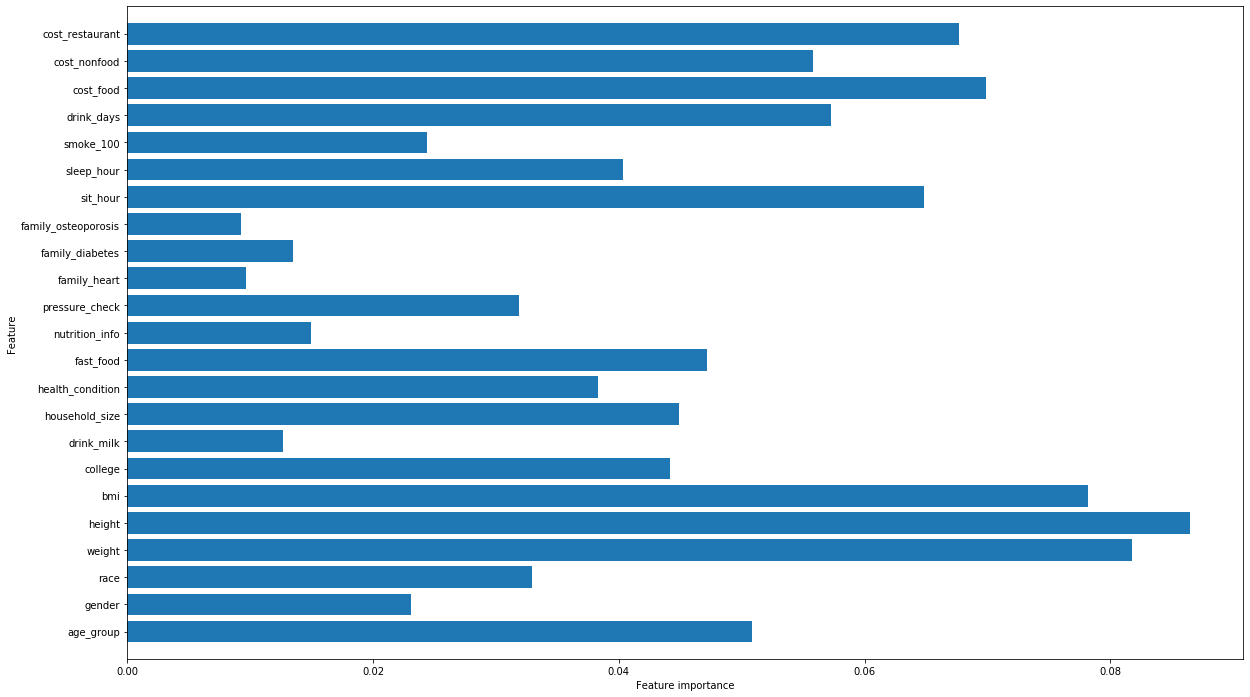

In [77]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(20, 12))
plot_feature_importances(forest)

### 4.6.8 Neural Network

In [78]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

target = to_categorical(y_oral)
predictors = X_scaled
n_col = X_scaled.shape[1]

In [81]:
lr_to_test = [.00001, 0.001, 0.1, 1]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.5f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.00001
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 15s 4ms/step - loss: 0.6923 - accuracy: 0.5132 - val_loss: 0.6920 - val_accuracy: 0.5380
Epoch 2/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6921 - accuracy: 0.5170 - val_loss: 0.6917 - val_accuracy: 0.5410
Epoch 3/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6919 - accuracy: 0.5185 - val_loss: 0.6914 - val_accuracy: 0.5550
Epoch 4/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6917 - accuracy: 0.5232 - val_loss: 0.6911 - val_accuracy: 0.5580
Epoch 5/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6914 - accuracy: 0.5272 - val_loss: 0.6908 - val_accuracy: 0.5530


Current Learning Rate: 0.00100
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6854 - accuracy: 0.5590 - val_loss: 0.6753

In [82]:
lr_to_test = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]

# loop over learning rates
for lr in lr_to_test:
    print("Current Learning Rate: {:.2f}".format(lr))
    model = get_new_model_class_test()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 
    model.fit(predictors, target, validation_split=0.2, nb_epoch = 5)
    print()
    print()

Current Learning Rate: 0.01
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 14s 3ms/step - loss: 0.6808 - accuracy: 0.5648 - val_loss: 0.6576 - val_accuracy: 0.6150
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6738 - accuracy: 0.5765 - val_loss: 0.6548 - val_accuracy: 0.6150
Epoch 3/5
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6710 - accuracy: 0.5830 - val_loss: 0.6512 - val_accuracy: 0.6120
Epoch 4/5
4000/4000 [==============================] - 16s 4ms/step - loss: 0.6706 - accuracy: 0.5938 - val_loss: 0.6559 - val_accuracy: 0.6080
Epoch 5/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.6703 - accuracy: 0.5875 - val_loss: 0.6552 - val_accuracy: 0.6150


Current Learning Rate: 0.05
Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 16s 4ms/step - loss: 0.6861 - accuracy: 0.5667 - val_loss: 0.6586 - val

In [83]:
model_best = get_new_model_class_test()
my_optimizer = SGD(lr=0.01)
model_best.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy']) 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
result = model_best.fit(X_train, y_train, nb_epoch = 5)

Epoch 1/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6758 - accuracy: 0.5727
Epoch 2/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6688 - accuracy: 0.5878
Epoch 3/5
4000/4000 [==============================] - 15s 4ms/step - loss: 0.6678 - accuracy: 0.5925
Epoch 4/5
4000/4000 [==============================] - 15s 4ms/step - loss: 0.6663 - accuracy: 0.5943
Epoch 5/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6651 - accuracy: 0.5928


In [85]:
training_predictions = model_best.predict(X_train)
testing_predictions = model_best.predict(X_test)
training_probability_true = training_predictions[:,1]
testing_probability_true = testing_predictions[:,1]

classificationSummary(y_train[:,1],training_probability_true > 0.5)
classificationSummary(y_test[:,1], testing_probability_true > 0.5)

print(classification_report(y_test[:,1], testing_probability_true > 0.5))

Confusion Matrix (Accuracy 0.5747)

       Prediction
Actual    0    1
     0  709 1323
     1  378 1590
Confusion Matrix (Accuracy 0.5980)

       Prediction
Actual   0   1
     0 190 311
     1  91 408
              precision    recall  f1-score   support

         0.0       0.68      0.38      0.49       501
         1.0       0.57      0.82      0.67       499

    accuracy                           0.60      1000
   macro avg       0.62      0.60      0.58      1000
weighted avg       0.62      0.60      0.58      1000



# 5. Model Selection - Results

## 5.1 Depression - Naive Bayes

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y_depression, random_state=1, test_size = 0.2)

nbm = MultinomialNB(alpha=1000)
nb_depression=nbm.fit(X_train,y_train)

depression_pred = nb_depression.predict(X_v)
depression_prob = nb_depression.predict_proba(X_v)[:,1]

print('Depression with Naive Bayes')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_depression_v, depression_pred))
print()
print('Classification Report')
print(classification_report(y_depression_v,depression_pred))

Depression with Naive Bayes

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.5280)

       Prediction
Actual   0   1
     0 323 294
     1  69  83
None

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       617
           1       0.22      0.55      0.31       152

    accuracy                           0.53       769
   macro avg       0.52      0.53      0.48       769
weighted avg       0.70      0.53      0.58       769



## 5.2 Frax - Random Forest

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y_frax, random_state=1, test_size = 0.2)

forest_frax = RandomForestClassifier(n_estimators=50,max_features=6,max_depth=15)
Forest_frax=forest_frax.fit(X_train, y_train)

frax_pred = Forest_frax.predict(X_v)
frax_prob = Forest_frax.predict_proba(X_v)[:,1]

print('Frax Risk with Random Forest')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_frax_v, frax_pred))
print()
print('Classification Report')
print(classification_report(y_frax_v,frax_pred))

Frax Risk with Random Forest

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.8804)

       Prediction
Actual   0   1
     0 583  29
     1  63  94
None

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       612
           1       0.76      0.60      0.67       157

    accuracy                           0.88       769
   macro avg       0.83      0.78      0.80       769
weighted avg       0.87      0.88      0.87       769



## 5.3 Hypertension - Random Forest

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hypertension, random_state=1, test_size = 0.2)

forest_hypertension = RandomForestClassifier(n_estimators=150,max_features=5,max_depth=5)
Forest_hypertension=forest_hypertension.fit(X_train, y_train)

hypertension_pred = Forest_hypertension.predict(X_v)
hypertension_prob = Forest_hypertension.predict_proba(X_v)[:,1]

print('Hypertension with Random Forest')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_hypertension_v, hypertension_pred))
print()
print('Classification Report')
print(classification_report(y_hypertension_v,hypertension_pred))

Hypertension with Random Forest

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.7841)

       Prediction
Actual   0   1
     0 385  63
     1 103 218
None

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       448
           1       0.78      0.68      0.72       321

    accuracy                           0.78       769
   macro avg       0.78      0.77      0.77       769
weighted avg       0.78      0.78      0.78       769



## 5.4 Cholesterol - Random Forest

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cholesterol, random_state=1, test_size = 0.2)

forest_cholesterol = RandomForestClassifier(n_estimators=50,max_features=6,max_depth=5)
Forest_cholesterol=forest_cholesterol.fit(X_train, y_train)

cholesterol_pred = Forest_cholesterol.predict(X_v)
cholesterol_prob = Forest_cholesterol.predict_proba(X_v)[:,1]

print('Cholesterol with Random Forest')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_cholesterol_v, cholesterol_pred))
print()
print('Classification Report')
print(classification_report(y_cholesterol_v,cholesterol_pred))

Cholesterol with Random Forest

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.6762)

       Prediction
Actual   0   1
     0 291 131
     1 118 229
None

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       422
           1       0.64      0.66      0.65       347

    accuracy                           0.68       769
   macro avg       0.67      0.67      0.67       769
weighted avg       0.68      0.68      0.68       769



## 5.5 Diabetes - Naive Bayes

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, random_state=1, test_size = 0.2)

nbm = MultinomialNB(alpha=10)
nb_diabetes=nbm.fit(X_train,y_train)

diabetes_pred = nb_diabetes.predict(X_v)
diabetes_prob = nb_diabetes.predict_proba(X_v)[:,1]

print('Diabetes with Naive Bayes')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_diabetes_v, diabetes_pred))
print()
print('Classification Report')
print(classification_report(y_diabetes_v,diabetes_pred))

Diabetes with Naive Bayes

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.7711)

       Prediction
Actual   0   1
     0 549  87
     1  89  44
None

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       636
           1       0.34      0.33      0.33       133

    accuracy                           0.77       769
   macro avg       0.60      0.60      0.60       769
weighted avg       0.77      0.77      0.77       769



## 5.6 Oral - SVM

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oral, random_state=1, test_size = 0.2)

steps = [('scaler', StandardScaler()),
         ('svm', SVC(probability = True))]

pipeline = Pipeline(steps)
parameters = {'svm__C':[1],
              'svm__gamma':[0.01]}

cv_svm_oral = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv_svm_oral.fit(X_train, y_train)
oral_pred = cv_svm_oral.predict(X_v)

oral_prob = cv_svm_oral.predict_proba(X_v)[:,1]

print('Oral Health with SVM')
print()
print('Confusion Matrix (Vaildation)')
print(classificationSummary(y_oral_v, oral_pred))
print()
print('Classification Report')
print(classification_report(y_oral_v,oral_pred))

Oral Health with SVM

Confusion Matrix (Vaildation)
Confusion Matrix (Accuracy 0.5943)

       Prediction
Actual   0   1
     0 233 160
     1 152 224
None

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       393
           1       0.58      0.60      0.59       376

    accuracy                           0.59       769
   macro avg       0.59      0.59      0.59       769
weighted avg       0.59      0.59      0.59       769



## 5.7 Probability Matrix

In [159]:
prob = (depression_prob, frax_prob, hypertension_prob, cholesterol_prob, diabetes_prob, oral_prob)

In [245]:
prob_matrix = pd.DataFrame(tuple(prob), index = ['depression_prob', 'frax_prob', 'hypertension_prob', 'cholesterol_prob', 'diabetes_prob', 'oral_prob']).transpose()

In [246]:
# prob_matrix['max_prob'] = prob_matrix.max(axis=1)

prob_matrix['max_prob'] = prob_matrix.idxmax(axis=1)

In [261]:
first_option = [*range(prob_matrix.shape[0])]

for i in range(prob_matrix.shape[0]):
    if prob_matrix.max_prob[i] == "depression_prob":
        first_option[i] = "depression"
    if prob_matrix.max_prob[i] == "frax_prob":
        first_option[i] = "frax_risk"
    if prob_matrix.max_prob[i] == "hypertension_prob":
        first_option[i] = "hypertension"
    if prob_matrix.max_prob[i] == "cholesterol_prob":
        first_option[i] = "cholesterol"
    if prob_matrix.max_prob[i] == "diabetes_prob":
        first_option[i] = "diabetes"
    if prob_matrix.max_prob[i] == "oral_prob":
        first_option[i] = "oral"
    else:
        first_option[i] == "-"

In [266]:
prob_matrix['first_option'] = first_option

In [267]:
print(prob_matrix)

     depression_prob  frax_prob  hypertension_prob  cholesterol_prob  \
0       9.999983e-01   0.421572           0.833565          0.693891   
1       1.443990e-07   0.449500           0.606449          0.577728   
2       6.390953e-08   0.510143           0.497422          0.594272   
3       1.000000e+00   0.040000           0.246315          0.393310   
4       5.756967e-10   0.120000           0.451780          0.613379   
..               ...        ...                ...               ...   
764     9.996699e-01   0.580086           0.627411          0.644874   
765     2.982870e-01   0.784559           0.619957          0.677700   
766     9.999686e-01   0.320000           0.413388          0.483341   
767     9.872074e-01   0.732751           0.794721          0.649050   
768     3.574694e-14   0.000000           0.155246          0.421866   

     diabetes_prob  oral_prob           max_prob  first_option  
0     9.999298e-01   0.408528    depression_prob    depression  
1    

In [230]:
# health_df_valid = health_df_valid.reset_index()
#health_df_valid = health_df_valid.drop(['level_0'], axis = 1)
# health_df_valid = health_df_valid.drop(['index'], axis = 1)
health_df_valid = health_df_valid.drop(['random'], axis = 1)

In [296]:
# print(health_df_valid)

In [269]:
health_df_valid_prob = pd.concat([health_df_valid, prob_matrix], axis = 1)

In [294]:
# print(health_df_valid_prob)

In [282]:
correct_prediction = [0] * health_df_valid_prob.shape[0]

In [290]:
for i in range(health_df_valid_prob.shape[0]):
    if health_df_valid_prob['first_option'][i] == 'depression' and health_df_valid_prob['depression'][i] == 1:
        correct_prediction[i] = 1
    if health_df_valid_prob['first_option'][i] == 'frax_risk' and health_df_valid_prob['frax_risk'][i] == 1:
        correct_prediction[i] = 1    
    if health_df_valid_prob['first_option'][i] == 'hypertension' and health_df_valid_prob['hypertension'][i] == 1:
        correct_prediction[i] = 1
    if health_df_valid_prob['first_option'][i] == 'cholesterol' and health_df_valid_prob['cholesterol'][i] == 1:
        correct_prediction[i] = 1
    if health_df_valid_prob['first_option'][i] == 'diabetes' and health_df_valid_prob['diabetes'][i] == 1:
        correct_prediction[i] = 1        
    if health_df_valid_prob['first_option'][i] == 'oral' and health_df_valid_prob['oral'][i] == 1:
        correct_prediction[i] = 1
    if health_df_valid_prob['depression'][i] == 0 and health_df_valid_prob['frax_risk'][i] == 0 and health_df_valid_prob['hypertension'][i] == 0 and health_df_valid_prob['cholesterol'][i] == 0 and health_df_valid_prob['diabetes'][i] == 0 and health_df_valid_prob['oral'][i] == 0:
        correct_prediction[i] = 0.001


In [292]:
print(np.sum(correct_prediction))

312.121


In [297]:
health_df_valid_prob['correct_prediction'] = correct_prediction

In [299]:
# print(health_df_valid_prob)